# Import data

In [1]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt

# check the version of these modules
print(np.__version__)
print(pickle.format_version)


1.23.4
4.0


#### import participant 1

In [123]:
# get data and label
# ** both 'data' and 'label' are pickled dict **
# load DE features named '1_123.npz'
# participant 1,2,3,4,5,6,7,8,9,10
ptz = 1
data_npz = np.load('../data/1_123.npz')
data = pickle.loads(data_npz['data'])
label = pickle.loads(data_npz['label'])

label_dict = {0: 'Disgust', 1: 'Fear', 2: 'Sad', 3: 'Neutral', 4: 'Happy'}

print(data.keys())
print(label.keys())

data_happy = data[0]
data_fear = data[1]
data_neutral = data[2]
data_sad = data[3]
data_disgust = data[4]


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])


# Check brainwave

/tmp/ipykernel_1899/1726222101.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=18).
  plt.specgram(data[i])


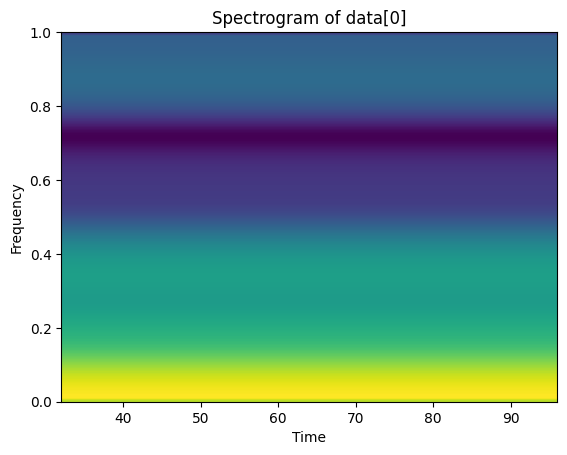

/tmp/ipykernel_1899/1726222101.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=24).
  plt.specgram(data[i])


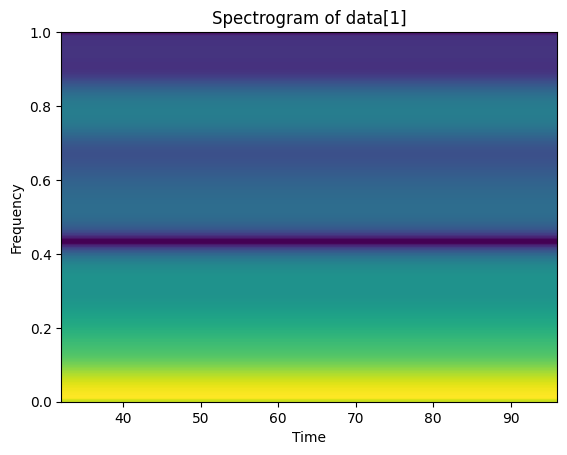

/tmp/ipykernel_1899/1726222101.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=59).
  plt.specgram(data[i])


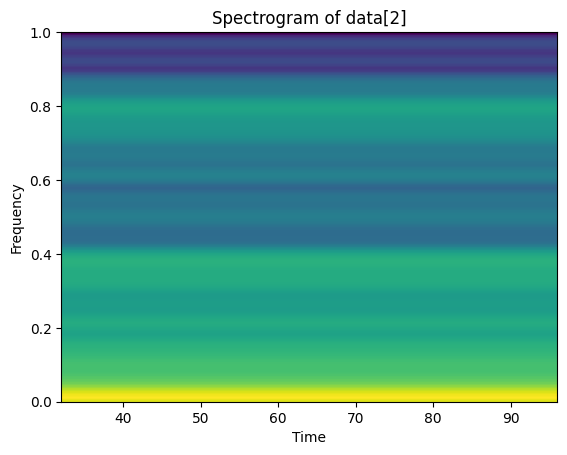

/tmp/ipykernel_1899/1726222101.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=46).
  plt.specgram(data[i])


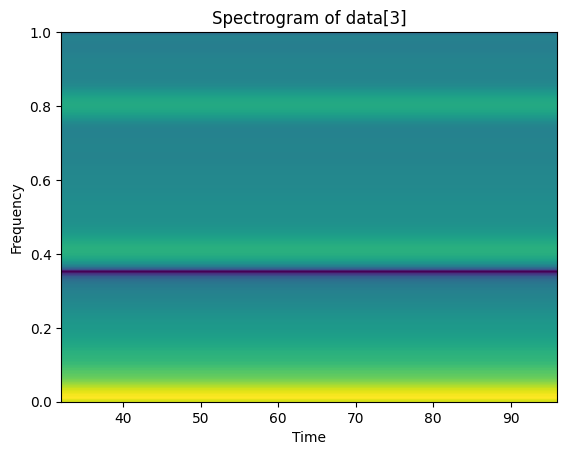

/tmp/ipykernel_1899/1726222101.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=36).
  plt.specgram(data[i])


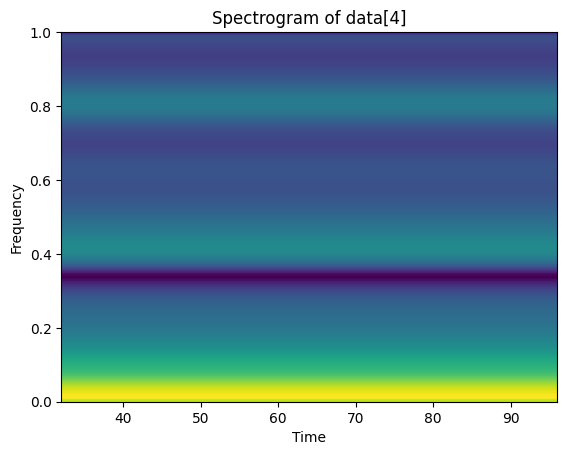

/tmp/ipykernel_1899/1726222101.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=64).
  plt.specgram(data[i])


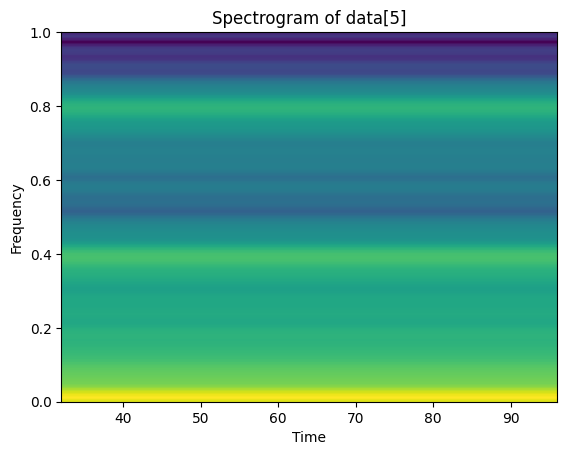

/tmp/ipykernel_1899/1726222101.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=74).
  plt.specgram(data[i])


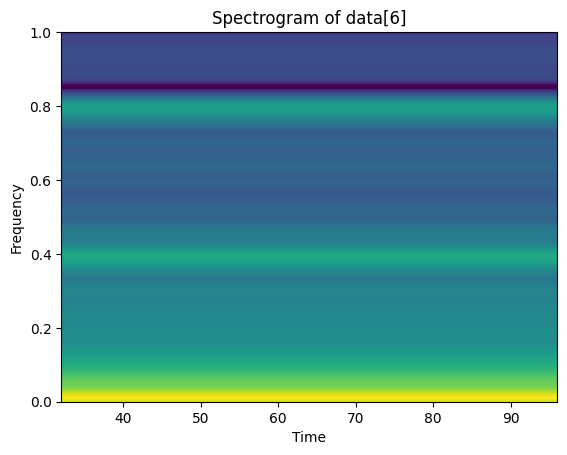

/tmp/ipykernel_1899/1726222101.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=17).
  plt.specgram(data[i])


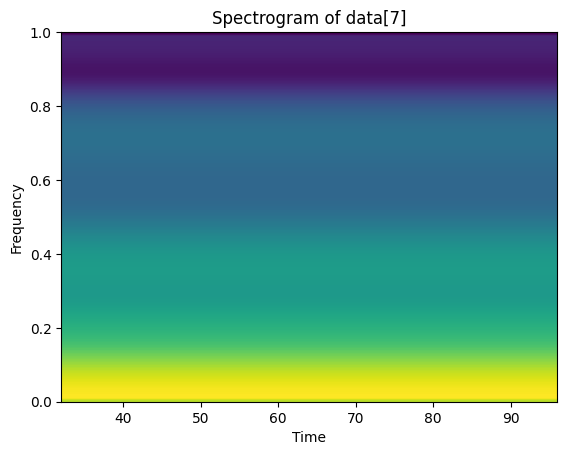

/tmp/ipykernel_1899/1726222101.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=66).
  plt.specgram(data[i])


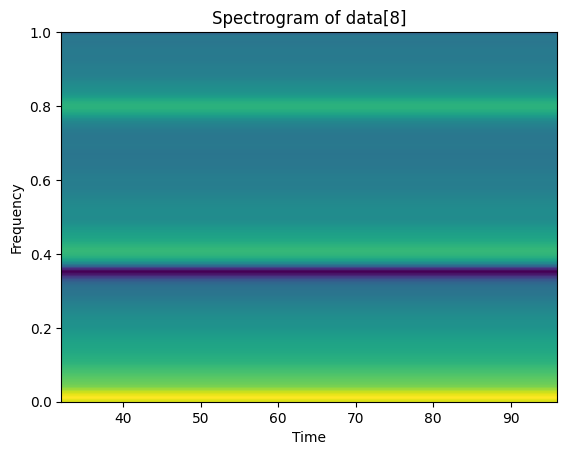

/tmp/ipykernel_1899/1726222101.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=35).
  plt.specgram(data[i])


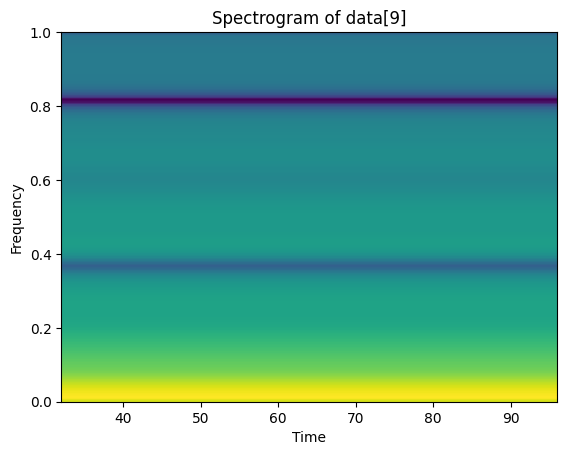

/tmp/ipykernel_1899/1726222101.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=43).
  plt.specgram(data[i])


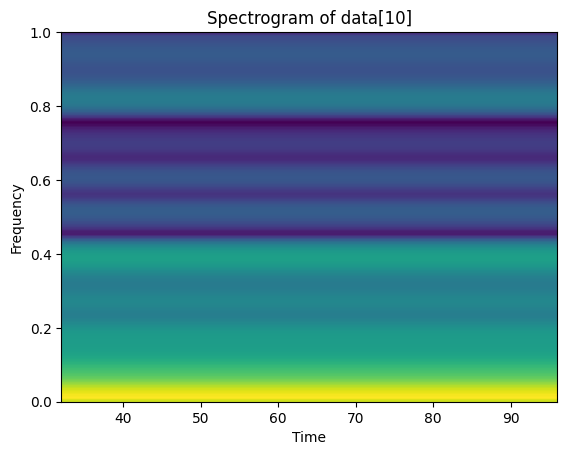

In [6]:
import matplotlib.pyplot as plt

start_index = 0
end_index = 10

# Iterate over the range of indices
for i in range(start_index, end_index + 1):
    # Plot the spectrogram of data[i]
    plt.specgram(data[i])

    # Set plot title and labels
    plt.title(f'Spectrogram of data[{i}]')
    plt.xlabel('Time')
    plt.ylabel('Frequency')

    # Display the plot
    plt.show()


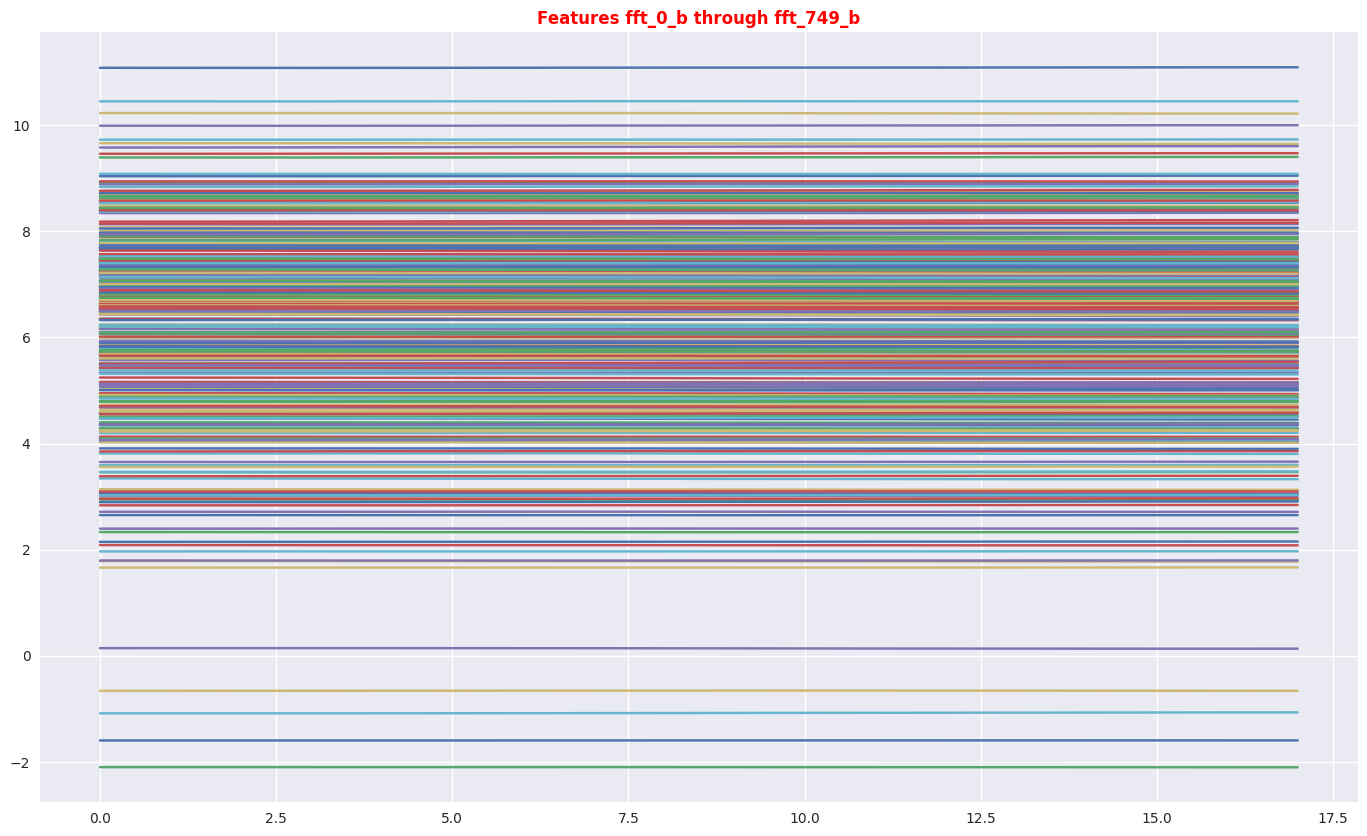

In [7]:
import matplotlib.pyplot as plt

# Replace 'sample' with your actual data
data_s = data[0]

plt.style.use('seaborn')
plt.figure(figsize=(17, 10))
plt.plot(range(len(data_s)), data_s)
plt.title("Features fft_0_b through fft_749_b", weight='bold', color='red')
plt.show()


# investiga each channels

In [8]:
Session_1 = {
  'start_second': [30, 132, 287, 555, 773, 982, 1271, 1628, 1730, 2025, 2227, 2435, 2667, 2932, 3204],
  'end_second': [102, 228, 524, 742, 920, 1240, 1568, 1697, 1994, 2166, 2401, 2607, 2901, 3172, 3359]
}

Session_2 = {
  'start_second': [30, 299, 548, 646, 836, 1000, 1091, 1392, 1657, 1809, 1966, 2186, 2333, 2490, 2741],
  'end_second': [267, 488, 614, 773, 967, 1059, 1331, 1622, 1777, 1908, 2153, 2302, 2428, 2709, 2817]
}

Session_3 = {
  'start_second': [30, 353, 478, 674, 825, 908, 1200, 1346, 1451, 1711, 2055, 2307, 2457, 2726, 2888],
  'end_second': [321, 418, 643, 764, 877, 1147, 1284, 1418, 1679, 1996, 2275, 2425, 2664, 2857, 3066]
}

In [9]:
def calculate_session_duration(sessions):
    durations = {}
    for i, session in enumerate(sessions):
        start_times = session['start_second']
        end_times = session['end_second']
        session_durations = {}
        for j in range(len(start_times)):
            duration = end_times[j] - start_times[j]
            session_durations[f'V{j+1}'] = round(duration, 2)
        durations[f'Session_{i+1}'] = session_durations
    return durations


sessions = [Session_1, Session_2, Session_3]
durations = calculate_session_duration(sessions)
print(durations)


{'Session_1': {'V1': 72, 'V2': 96, 'V3': 237, 'V4': 187, 'V5': 147, 'V6': 258, 'V7': 297, 'V8': 69, 'V9': 264, 'V10': 141, 'V11': 174, 'V12': 172, 'V13': 234, 'V14': 240, 'V15': 155}, 'Session_2': {'V1': 237, 'V2': 189, 'V3': 66, 'V4': 127, 'V5': 131, 'V6': 59, 'V7': 240, 'V8': 230, 'V9': 120, 'V10': 99, 'V11': 187, 'V12': 116, 'V13': 95, 'V14': 219, 'V15': 76}, 'Session_3': {'V1': 291, 'V2': 65, 'V3': 165, 'V4': 90, 'V5': 52, 'V6': 239, 'V7': 84, 'V8': 72, 'V9': 228, 'V10': 285, 'V11': 220, 'V12': 118, 'V13': 207, 'V14': 131, 'V15': 178}}


In [10]:
Second = {
  'Session_1': {'V1': 72, 'V2': 96, 'V3': 237, 'V4': 187, 'V5': 147, 'V6': 258, 'V7': 297, 'V8': 69, 'V9': 264, 'V10': 141, 'V11': 174, 'V12': 172, 'V13': 234, 'V14': 240, 'V15': 155}, 
  'Session_2': {'V1': 237, 'V2': 189, 'V3': 66, 'V4': 127, 'V5': 131, 'V6': 59, 'V7': 240, 'V8': 230, 'V9': 120, 'V10': 99, 'V11': 187, 'V12': 116, 'V13': 95, 'V14': 219, 'V15': 76}, 
  'Session_3': {'V1': 291, 'V2': 65, 'V3': 165, 'V4': 90, 'V5': 52, 'V6': 239, 'V7': 84, 'V8': 72, 'V9': 228, 'V10': 285, 'V11': 220, 'V12': 118, 'V13': 207, 'V14': 131, 'V15': 178}
}

Each_duration = {
  'Session_1': {'V1': 1.2, 'V2': 1.6, 'V3': 3.95, 'V4': 3.12, 'V5': 2.45, 'V6': 4.3, 'V7': 4.95, 'V8': 1.15, 'V9': 4.4, 'V10': 2.35, 'V11': 2.9, 'V12': 2.87, 'V13': 3.9, 'V14': 4.0, 'V15': 2.58}, 
  'Session_2': {'V1': 3.95, 'V2': 3.15, 'V3': 1.1, 'V4': 2.12, 'V5': 2.18, 'V6': 59, 'V7': 4.0, 'V8': 3.83, 'V9': 2.0, 'V10': 1.65, 'V11': 3.12, 'V12': 1.93, 'V13': 1.58, 'V14': 3.65, 'V15': 1.27}, 
  'Session_3': {'V1': 4.85, 'V2': 1.08, 'V3': 2.75, 'V4': 1.5, 'V5': 52, 'V6': 3.98, 'V7': 1.4, 'V8': 1.2, 'V9': 3.8, 'V10': 4.75, 'V11': 3.67, 'V12': 1.97, 'V13': 3.45, 'V14': 2.18, 'V15': 2.97}
}

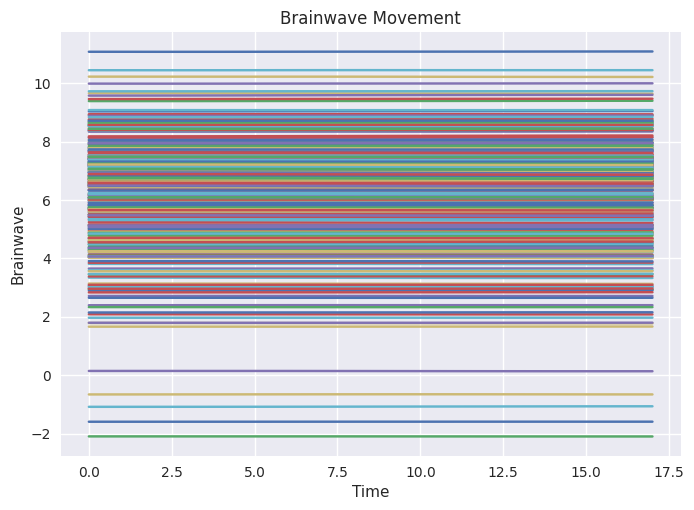

In [11]:
import matplotlib.pyplot as plt

plt.plot(data[0])
plt.xlabel('Time')
plt.ylabel('Brainwave')
plt.title('Brainwave Movement')
plt.show()


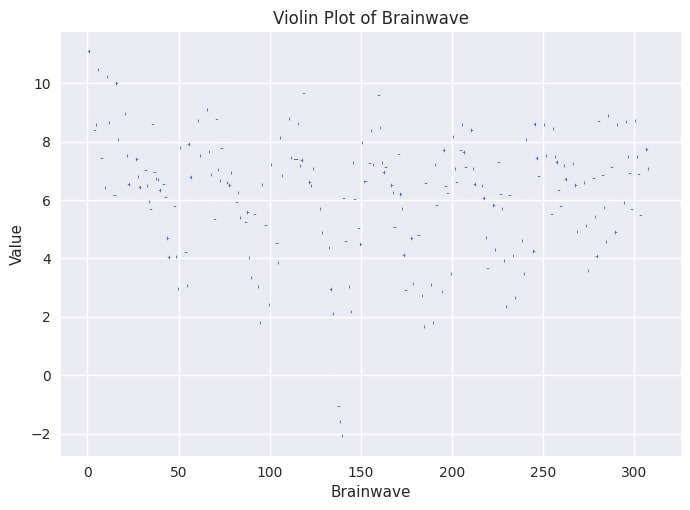

In [12]:
import matplotlib.pyplot as plt

plt.violinplot(data[0])
plt.xlabel('Brainwave')
plt.ylabel('Value')
plt.title('Violin Plot of Brainwave')
plt.show()


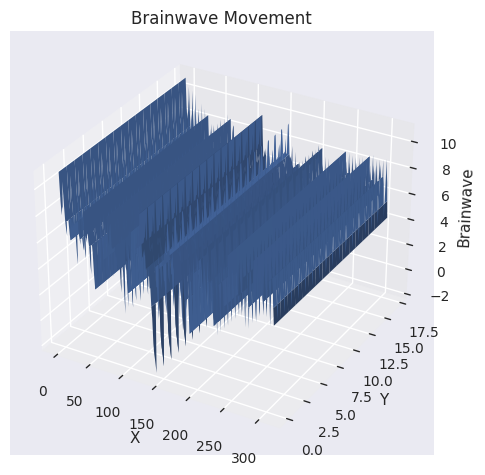

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data_array = data[0]
x = range(data_array.shape[1])
y = range(data_array.shape[0])
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, data_array)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Brainwave')
ax.set_title('Brainwave Movement')
plt.show()


In [110]:
df_0_happy = pd.DataFrame(data=data[34])
df_0 = df_0_happy
df_0


0         1         2         3         4          5         6    \
0   10.313151  8.621372  7.377952  7.118581  6.820037  10.119018  8.572766   
1   10.313455  8.622142  7.378503  7.118505  6.819895  10.119639  8.573696   
2   10.313604  8.623188  7.379257  7.118208  6.819552  10.120433  8.574925   
3   10.314213  8.624541  7.379931  7.117794  6.819010  10.121662  8.576371   
4   10.315610  8.626290  7.380466  7.117532  6.818435  10.123369  8.578119   
5   10.318025  8.628753  7.381139  7.117391  6.818045  10.125999  8.580578   
6   10.321274  8.631378  7.381834  7.117292  6.817805  10.129223  8.583201   
7   10.324867  8.634234  7.383041  7.117250  6.817679  10.132587  8.585908   
8   10.327352  8.636166  7.384012  7.117288  6.817577  10.135058  8.587818   
9   10.328247  8.636713  7.384175  7.117339  6.817510  10.136205  8.588514   
10  10.327870  8.636114  7.383662  7.117290  6.817443  10.136272  8.588154   
11  10.326770  8.634785  7.382869  7.117053  6.817408  10.135784  8.587183   
12  10.325953  8.633559  7.382284  7.116756  6.817282  10.135419  8.586095   

         7         8         9    ...       300       301       302       303  \
0   7.272529  6.410712  5.830120  ...  8.815807  7.158171  6.846133  5.626165   
1   7.273211  6.410504  5.829956  ...  8.815903  7.157784  6.846146  5.626050   
2   7.274150  6.410203  5.829621  ...  8.816163  7.156895  6.846116  5.625735   
3   7.275097  6.409843  5.829117  ...  8.816617  7.155690  6.846250  5.625190   
4   7.276001  6.409573  5.828664  ...  8.817408  7.154184  6.846431  5.624588   
5   7.277087  6.409579  5.828609  ...  8.818549  7.152835  6.846765  5.623933   
6   7.278173  6.409708  5.828834  ...  8.820030  7.152018  6.847336  5.623322   
7   7.279512  6.409837  5.829233  ...  8.821676  7.151608  6.848079  5.622663   
8   7.280507  6.409785  5.829554  ...  8.823227  7.151305  6.848882  5.621944   
9   7.280642  6.409590  5.829877  ...  8.824346  7.151115  6.849494  5.621312   
10  7.280044  6.409362  5.830030  ...  8.825187  7.150947  6.849811  5.620793   
11  7.279168  6.409110  5.830027  ...  8.825687  7.150779  6.849888  5.620435   
12  7.278376  6.408742  5.829818  ...  8.825840  7.150438  6.849839  5.620206   

         304       305       306       307       308       309  
0   4.906987  9.258922  7.440506  6.971385  5.460214  4.430060  
1   4.906906  9.258997  7.440199  6.971428  5.460267  4.430000  
2   4.906564  9.258932  7.439624  6.971340  5.460322  4.429840  
3   4.905837  9.258889  7.439003  6.971237  5.460320  4.429570  
4   4.904780  9.259018  7.438197  6.971128  5.460350  4.429098  
5   4.903633  9.259582  7.437412  6.971268  5.460369  4.428505  
6   4.902509  9.260391  7.436825  6.971692  5.460267  4.428017  
7   4.901446  9.261336  7.436464  6.972254  5.460011  4.427767  
8   4.900428  9.262260  7.436137  6.972858  5.459669  4.427715  
9   4.899537  9.262755  7.435916  6.973340  5.459257  4.427690  
10  4.898850  9.263003  7.435762  6.973588  5.458837  4.427678  
11  4.898491  9.263133  7.435634  6.973608  5.458529  4.427776  
12  4.898351  9.263281  7.435475  6.973424  5.458364  4.427901  

[13 rows x 310 columns]

In [111]:
df_1_fear = pd.DataFrame(data=data[31])
df_1 = df_1_fear
df_1

0         1         2         3         4         5         6    \
0    9.960686  8.151971  7.146431  7.921809  7.899733  9.580269  7.890147   
1    9.961912  8.152298  7.146268  7.921557  7.899058  9.581462  7.890075   
2    9.964335  8.153229  7.146325  7.921283  7.897769  9.583849  7.890361   
3    9.967296  8.154934  7.147028  7.920979  7.895965  9.586496  7.891244   
4    9.971102  8.157403  7.148334  7.920476  7.893734  9.589528  7.892798   
5    9.975678  8.160750  7.150312  7.919927  7.891259  9.593044  7.894808   
6    9.981066  8.164988  7.152717  7.919328  7.888824  9.597071  7.897268   
7    9.986722  8.169932  7.155240  7.918758  7.886629  9.601022  7.899929   
8    9.991439  8.174324  7.157328  7.918328  7.884633  9.603966  7.901953   
9    9.995647  8.178369  7.159132  7.918132  7.882741  9.606169  7.903411   
10   9.999492  8.182129  7.160546  7.918040  7.880961  9.607875  7.904384   
11  10.003345  8.186031  7.162055  7.917858  7.879292  9.609489  7.905360   
12  10.007596  8.190328  7.163497  7.917573  7.878099  9.611283  7.906697   
13  10.011678  8.194289  7.164744  7.917304  7.877337  9.613082  7.908094   
14  10.014870  8.197375  7.165542  7.917106  7.876868  9.614670  7.909427   
15  10.016672  8.199077  7.165940  7.917091  7.876622  9.615695  7.910266   

         7         8         9    ...       300       301       302       303  \
0   6.787358  7.757734  7.219117  ...  8.246942  7.239454  6.270616  5.374165   
1   6.787108  7.757661  7.218545  ...  8.246818  7.239414  6.270504  5.373875   
2   6.787119  7.757655  7.217778  ...  8.247181  7.239312  6.270370  5.373678   
3   6.787922  7.757649  7.216984  ...  8.247970  7.239078  6.270605  5.373435   
4   6.789239  7.757630  7.216370  ...  8.248825  7.238871  6.271002  5.373077   
5   6.790915  7.757638  7.215929  ...  8.249576  7.238622  6.271614  5.372753   
6   6.792586  7.757532  7.215624  ...  8.250075  7.238445  6.272373  5.372606   
7   6.793964  7.757352  7.215396  ...  8.250262  7.238574  6.273147  5.372594   
8   6.794687  7.757058  7.215095  ...  8.250252  7.238911  6.273897  5.372795   
9   6.794888  7.756592  7.214860  ...  8.250124  7.239025  6.274671  5.373102   
10  6.794595  7.755957  7.214644  ...  8.250303  7.238844  6.275295  5.373533   
11  6.794362  7.755236  7.214398  ...  8.250338  7.238386  6.275876  5.374100   
12  6.794180  7.754558  7.214268  ...  8.250123  7.237869  6.276051  5.374527   
13  6.793915  7.753905  7.214392  ...  8.249728  7.237598  6.275903  5.374815   
14  6.793581  7.753301  7.214751  ...  8.249233  7.237416  6.275607  5.375011   
15  6.793416  7.753031  7.215066  ...  8.248739  7.237385  6.275342  5.375114   

         304       305       306       307       308       309  
0   5.023971  8.581922  7.762542  6.388090  5.178391  4.034966  
1   5.023752  8.581479  7.762563  6.387922  5.178314  4.034764  
2   5.023538  8.581276  7.762355  6.387820  5.178250  4.034560  
3   5.023356  8.581393  7.761811  6.388097  5.178096  4.034294  
4   5.023143  8.581746  7.761182  6.388600  5.177940  4.033908  
5   5.022994  8.582052  7.760414  6.389315  5.177863  4.033495  
6   5.022892  8.582100  7.759713  6.390411  5.177918  4.033133  
7   5.022735  8.581953  7.759397  6.391615  5.178124  4.032747  
8   5.022582  8.581992  7.759546  6.392780  5.178271  4.032382  
9   5.022574  8.582263  7.759810  6.393953  5.178457  4.032070  
10  5.022542  8.583066  7.760110  6.395073  5.178781  4.031991  
11  5.022406  8.583867  7.760611  6.396478  5.179125  4.031985  
12  5.022109  8.584415  7.761290  6.397464  5.179283  4.031976  
13  5.021728  8.584670  7.762144  6.397977  5.179289  4.032039  
14  5.021359  8.584672  7.762845  6.398119  5.179306  4.032185  
15  5.021081  8.584431  7.763334  6.398123  5.179423  4.032349  

[16 rows x 310 columns]

In [114]:
df_2_neutral = pd.DataFrame(data=data[37])
df_2 = df_2_neutral
df_2

0         1         2         3         4         5         6    \
0   9.374343  7.659354  7.006914  8.774740  8.471510  9.197752  7.722094   
1   9.374349  7.658906  7.006707  8.774642  8.471243  9.197744  7.721796   
2   9.374330  7.658505  7.006731  8.774687  8.470731  9.197709  7.721537   
3   9.373591  7.657540  7.006828  8.775002  8.469947  9.197269  7.721342   
4   9.372470  7.656144  7.007037  8.775576  8.468938  9.196505  7.721164   
5   9.371640  7.654922  7.007734  8.776285  8.467641  9.196018  7.721351   
6   9.370878  7.654158  7.008782  8.777057  8.466090  9.195942  7.722004   
7   9.369992  7.653899  7.010141  8.777824  8.464322  9.196001  7.723151   
8   9.369002  7.653947  7.011656  8.778427  8.462480  9.195931  7.724453   
9   9.368473  7.654403  7.013304  8.778727  8.460574  9.195915  7.725867   
10  9.369028  7.655381  7.015222  8.778755  8.458583  9.196710  7.727568   
11  9.370236  7.657291  7.017343  8.778460  8.456438  9.197801  7.729846   
12  9.371945  7.659878  7.019657  8.778142  8.454377  9.199215  7.732497   
13  9.373038  7.662236  7.021643  8.777786  8.452396  9.200218  7.735015   
14  9.373520  7.663887  7.023138  8.777509  8.450593  9.200753  7.736932   
15  9.373335  7.664821  7.024199  8.777414  8.449006  9.200476  7.737965   
16  9.373125  7.665131  7.024964  8.777402  8.447705  9.199858  7.738228   
17  9.372769  7.664638  7.025101  8.777355  8.446889  9.199245  7.737941   

         7         8         9    ...       300       301       302       303  \
0   6.691345  8.459260  7.879050  ...  8.550484  7.362776  6.626307  5.193585   
1   6.691070  8.459138  7.878899  ...  8.550481  7.362450  6.626510  5.193497   
2   6.690996  8.458982  7.878635  ...  8.550278  7.361713  6.626730  5.193276   
3   6.691475  8.458912  7.878354  ...  8.549707  7.360593  6.626598  5.192969   
4   6.692213  8.459065  7.878116  ...  8.548901  7.358937  6.625849  5.192385   
5   6.693548  8.459448  7.877722  ...  8.547926  7.357102  6.624884  5.191508   
6   6.695475  8.459885  7.877305  ...  8.546605  7.354982  6.623681  5.190489   
7   6.697760  8.460252  7.876755  ...  8.545254  7.352706  6.622500  5.189671   
8   6.700187  8.460549  7.876202  ...  8.544200  7.350512  6.621365  5.188900   
9   6.702613  8.460772  7.875680  ...  8.543304  7.348620  6.620396  5.188092   
10  6.705246  8.460978  7.875442  ...  8.542293  7.347376  6.619775  5.187385   
11  6.708115  8.460985  7.875360  ...  8.540998  7.346311  6.619432  5.186880   
12  6.711167  8.461012  7.875310  ...  8.539647  7.345114  6.619193  5.186611   
13  6.713937  8.461006  7.875248  ...  8.538283  7.343666  6.618824  5.186427   
14  6.716146  8.461024  7.875341  ...  8.537046  7.341771  6.618175  5.186220   
15  6.717705  8.461150  7.875393  ...  8.535959  7.339528  6.617569  5.185947   
16  6.718715  8.461388  7.875394  ...  8.535064  7.337840  6.617139  5.185797   
17  6.719005  8.461523  7.875367  ...  8.534254  7.336764  6.617047  5.185847   

         304       305       306       307       308       309  
0   3.712797  8.683421  7.597741  6.720611  5.288688  3.671244  
1   3.712639  8.682829  7.597711  6.720730  5.288619  3.671185  
2   3.712325  8.681582  7.597621  6.720814  5.288573  3.671162  
3   3.711820  8.679566  7.597261  6.720667  5.288553  3.671098  
4   3.711141  8.676882  7.596499  6.720014  5.288458  3.671050  
5   3.710317  8.673863  7.595580  6.719100  5.288290  3.671012  
6   3.709495  8.670499  7.594515  6.717927  5.288168  3.671030  
7   3.708508  8.666951  7.593506  6.716805  5.288240  3.671099  
8   3.707244  8.663762  7.592689  6.715774  5.288306  3.671065  
9   3.705823  8.661313  7.592176  6.714791  5.288271  3.670921  
10  3.704299  8.659166  7.592172  6.714132  5.288277  3.670642  
11  3.702913  8.657182  7.592222  6.713799  5.288384  3.670477  
12  3.701595  8.655460  7.592101  6.713622  5.288688  3.670300  
13  3.700257  8.653708  7.591717  6.713336  5.289050  3.669939  
14  3.698874  8.652130  7.590907  6.712860  5.289

In [115]:
df_3_sad = pd.DataFrame(data=data[38])
df_3 = df_3_sad
df_3

0         1         2         3         4         5         6    \
0   9.644440  7.843419  6.764651  6.222987  5.918258  9.367830  7.820063   
1   9.645361  7.843621  6.764529  6.223288  5.918185  9.368250  7.820201   
2   9.647024  7.844317  6.764389  6.223339  5.918179  9.369506  7.820893   
3   9.649241  7.845802  6.764525  6.223262  5.918456  9.371043  7.822154   
4   9.651752  7.848109  6.765231  6.223257  5.918981  9.372921  7.824162   
5   9.654766  7.851297  6.766577  6.223320  5.919726  9.375445  7.826870   
6   9.658415  7.855000  6.768296  6.223281  5.920421  9.378856  7.830170   
7   9.662526  7.859042  6.770198  6.223168  5.921209  9.383053  7.833796   
8   9.667048  7.863474  6.772542  6.222933  5.922102  9.388230  7.837843   
9   9.671855  7.868302  6.775288  6.222626  5.922925  9.394050  7.842416   
10  9.677071  7.873886  6.778464  6.222408  5.923822  9.400598  7.847673   
11  9.681025  7.879107  6.781870  6.222045  5.924637  9.406766  7.852966   
12  9.683040  7.882776  6.784549  6.221361  5.925317  9.411547  7.857193   
13  9.682857  7.884539  6.786026  6.220398  5.925730  9.414599  7.860060   
14  9.680552  7.884533  6.786256  6.219209  5.925880  9.415908  7.861685   
15  9.677223  7.883534  6.785517  6.217780  5.925828  9.416318  7.862584   
16  9.674306  7.882753  6.784304  6.216001  5.925714  9.417142  7.863715   
17  9.671662  7.882747  6.783104  6.213868  5.925711  9.418238  7.865595   
18  9.669108  7.883184  6.781898  6.211439  5.925883  9.419712  7.868113   
19  9.666689  7.883757  6.780692  6.208794  5.926062  9.421516  7.871240   
20  9.663854  7.884306  6.779399  6.206012  5.926118  9.423321  7.874806   
21  9.660883  7.885582  6.778324  6.203171  5.925989  9.425228  7.879281   
22  9.657688  7.886503  6.776727  6.200086  5.925581  9.426951  7.883291   
23  9.653877  7.886327  6.774112  6.196663  5.924894  9.427753  7.885943   
24  9.649220  7.885025  6.770570  6.192765  5.923917  9.427031  7.887145   
25  9.643806  7.883010  6.766569  6.188574  5.922673  9.425077  7.887383   
26  9.638106  7.880960  6.762564  6.184330  5.921291  9.422646  7.887420   
27  9.632806  7.879308  6.758477  6.180073  5.920065  9.420523  7.887812   
28  9.627612  7.877485  6.754159  6.175858  5.918997  9.418360  7.888039   
29  9.622583  7.875214  6.749528  6.171600  5.918009  9.416009  7.887720   
30  9.617883  7.872789  6.745031  6.167334  5.917242  9.413554  7.887049   
31  9.614126  7.870845  6.740817  6.163266  5.916522  9.411867  7.886871   
32  9.611434  7.869600  6.737246  6.159631  5.915936  9.411113  7.887174   
33  9.609535  7.868685  6.733846  6.155942  5.915355  9.410918  7.887623   
34  9.608358  7.868213  6.730534  6.152338  5.914866  9.411169  7.888282   
35  9.607913  7.867753  6.727241  6.148791  5.914614  9.411915  7.888787   
36  9.608398  7.867882  6.724392  6.145361  5.914541  9.413587  7.889862   
37  9.609794  7.868617  6.721868  6.142037  5.914378  9.416032  7.891601   
38  9.611906  7.869977  6.719592  6.138985  5.914173  9.419218  7.894003   
39  9.613963  7.871575  6.717444  6.136130  5.913908  9.422434  7.896737   
40  9.615702  7.873286  6.715478  6.133491  5.913949  9.425424  7.899743   
41  9.617030  7.874909  6.713750  6.131400  5.914376  9.428010  7.902693   
42  9.617900  7.876361  6.712383  6.129758  5.915078  9.430127  7.905464   
43  9.618340  7.877370  6.711084  6.128507  5.915972  9.431873  7.907874   
44  9.618574  7.877965  6.709634  6.127457  5.917065  9.433408  7.909870   
45  9.619249  7.878738  6.707997  6.126454  5.918096  9.435234  7.911970   
46  9.620119  7.879615  6.706085  6.125429  5.919038  9.437129  7.914011   
47  9.621215  7.880520  6.703769  6.124483  5.919609  9.439157  7.915932   
48  9.622042  7.881204  6.701186  6.123538  5.919790  9.440749  7.917436   
49  9.623187  7.881638  6.698811  6.122753  5.919773  9.442568  7.918528   
50  9.624487  7.881876  6.696732  6.122129  5.919783  9.444376  7.919145   
51  9.626026  7.881983  6.694722  6.121367  5.919744  9.4

In [122]:
df_4_disgust = pd.DataFrame(data=data[29])
df_4 = df_4_disgust
df_4

0         1         2         3         4          5         6    \
0   10.482748  8.645475  7.291207  6.903606  7.312566  10.147567  8.512146   
1   10.482301  8.645471  7.290960  6.904126  7.313326  10.147077  8.512197   
2   10.481749  8.645642  7.290892  6.905326  7.314854  10.146510  8.512461   
3   10.481109  8.645425  7.291374  6.906950  7.316849  10.145775  8.512387   
4   10.480367  8.644963  7.292467  6.908986  7.319050  10.144958  8.512105   
5   10.479735  8.644683  7.294066  6.911354  7.321472  10.144552  8.512003   
6   10.479679  8.645212  7.296180  6.913720  7.323826  10.144940  8.512771   
7   10.479901  8.646601  7.298617  6.915961  7.325906  10.145572  8.514317   
8   10.480384  8.648772  7.301467  6.918131  7.327833  10.146622  8.516643   
9   10.481221  8.651234  7.304351  6.920327  7.329672  10.148169  8.519364   
10  10.482233  8.653431  7.307011  6.922409  7.331423  10.149968  8.521946   
11  10.483642  8.655343  7.309357  6.924358  7.332985  10.152176  8.524132   
12  10.485627  8.657132  7.311457  6.926093  7.334426  10.154944  8.526104   
13  10.487876  8.658753  7.313346  6.927687  7.335896  10.157902  8.527947   
14  10.490386  8.660342  7.315468  6.929262  7.337531  10.160849  8.529817   
15  10.493503  8.662120  7.317919  6.930801  7.339063  10.163990  8.531759   
16  10.496843  8.663921  7.320559  6.932160  7.340431  10.167116  8.533655   
17  10.500039  8.665539  7.322921  6.933250  7.341557  10.169957  8.535399   
18  10.502213  8.666612  7.324352  6.933905  7.342280  10.171874  8.536527   

         7         8         9    ...       300       301       302       303  \
0   7.157295  7.439422  8.445440  ...  8.799343  7.301474  6.381918  5.355555   
1   7.157214  7.440389  8.446608  ...  8.799556  7.301525  6.381794  5.355854   
2   7.157320  7.442391  8.448743  ...  8.799962  7.301405  6.381688  5.356331   
3   7.157887  7.445112  8.451634  ...  8.800309  7.301393  6.381704  5.357013   
4   7.158963  7.448393  8.455034  ...  8.800502  7.301760  6.382001  5.357717   
5   7.160551  7.452190  8.458905  ...  8.800795  7.302695  6.382194  5.358309   
6   7.162736  7.456366  8.463001  ...  8.801130  7.304123  6.382186  5.358359   
7   7.165174  7.460703  8.466888  ...  8.801854  7.305833  6.382105  5.357921   
8   7.168116  7.465075  8.470511  ...  8.802873  7.307586  6.381924  5.357090   
9   7.171239  7.469444  8.473870  ...  8.804150  7.309528  6.381477  5.355967   
10  7.174226  7.473644  8.476900  ...  8.805132  7.311557  6.380815  5.354741   
11  7.176951  7.477528  8.479554  ...  8.805875  7.313367  6.380075  5.353559   
12  7.179379  7.480978  8.481861  ...  8.806602  7.315040  6.379219  5.352476   
13  7.181498  7.483820  8.483949  ...  8.807508  7.316585  6.378603  5.351590   
14  7.183739  7.486132  8.485872  ...  8.809035  7.317968  6.378281  5.351136   
15  7.186123  7.488036  8.487670  ...  8.811067  7.319299  6.378138  5.351014   
16  7.188676  7.489435  8.489185  ...  8.812862  7.320410  6.378219  5.350965   
17  7.191078  7.490254  8.490336  ...  8.814134  7.321261  6.378358  5.350918   
18  7.192578  7.490662  8.491064  ...  8.814653  7.321864  6.378360  5.350718   

         304       305       306       307       308       309  
0   4.444872  8.804396  7.308886  6.388767  5.356541  4.432668  
1   4.445703  8.804601  7.308915  6.388631  5.356836  4.433521  
2   4.447098  8.805000  7.308759  6.388506  5.357315  4.434933  
3   4.448876  8.805346  7.308716  6.388517  5.358002  4.436715  
4   4.450409  8.805556  7.309068  6.388812  5.358711  4.438253  
5   4.451552  8.805872  7.309999  6.389007  5.359311  4.439373  
6   4.451463  8.806231  7.311430  6.388993  5.359368  4.439237  
7   4.450139  8.806970  7.313146  6.388902  5.358946  4.437856  
8   4.447729  8.808005  7.314905  6.388718  5.358135  4.435390  
9   4.444387  8.809302  7.316846  6.388278  5.357033  4.431991  
10  4.440750  8.810291  7.318866  6.387630  5.355845  4.428294  
11  4.437091  8.811037  7.320665  6.386901  5.35

# Plot every 15 columns

### Plotting with only 1 frequency band from first column

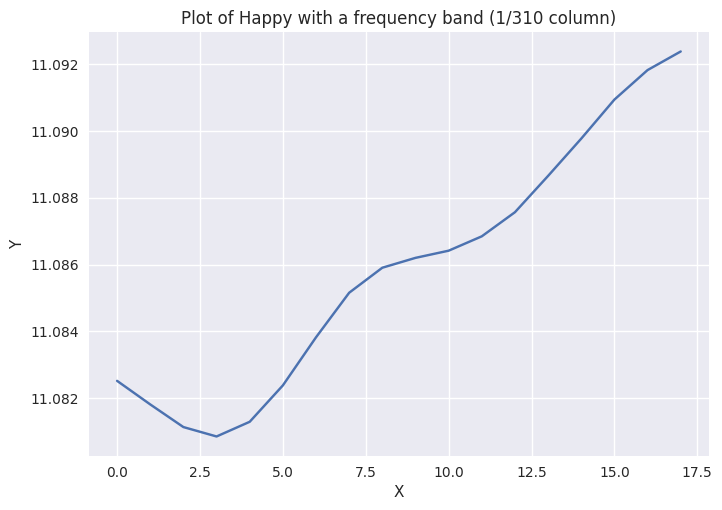

In [27]:
x = range(0, len(df_0_happy))
y = df_0_happy.iloc[:, 0]  # Selecting the first column as y

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(
    f'Plot of {label_dict[label[0][0]]} with a frequency band (1/310 column)')
plt.show()


### Print mean of each frequency band from different emotion

In [132]:
df_list = {'happy': df_0_happy, 'fear': df_1_fear, 'neutral': df_2_neutral, 'sad': df_3_sad, 'disgust': df_4_disgust}
for dfname, df in df_list.items():
  mean = "{:.2f}".format(df.iloc[:, 0].mean())
  max = "{:.2f}".format(df.iloc[:, 0].max())
  min = "{:.2f}".format(df.iloc[:, 0].min())
  contrast = "{:.2f}".format((df.iloc[:, 0].max() - df.iloc[:, 0].min()) * 10)
  print(
      f'{dfname}. Mean: {mean}, Max: {max}, Min: {min}, Contrast: {contrast}')


happy. Mean: 10.32, Max: 10.33, Min: 10.31, Contrast: 0.15
fear. Mean: 9.99, Max: 10.02, Min: 9.96, Contrast: 0.56
neutral. Mean: 9.37, Max: 9.37, Min: 9.37, Contrast: 0.06
sad. Mean: 9.64, Max: 9.68, Min: 9.61, Contrast: 0.75
disgust. Mean: 10.49, Max: 10.50, Min: 10.48, Contrast: 0.23


In [158]:
df.iloc[:, i:i+15]


300       301       302       303       304       305       306  \
0   8.799343  7.301474  6.381918  5.355555  4.444872  8.804396  7.308886   
1   8.799556  7.301525  6.381794  5.355854  4.445703  8.804601  7.308915   
2   8.799962  7.301405  6.381688  5.356331  4.447098  8.805000  7.308759   
3   8.800309  7.301393  6.381704  5.357013  4.448876  8.805346  7.308716   
4   8.800502  7.301760  6.382001  5.357717  4.450409  8.805556  7.309068   
5   8.800795  7.302695  6.382194  5.358309  4.451552  8.805872  7.309999   
6   8.801130  7.304123  6.382186  5.358359  4.451463  8.806231  7.311430   
7   8.801854  7.305833  6.382105  5.357921  4.450139  8.806970  7.313146   
8   8.802873  7.307586  6.381924  5.357090  4.447729  8.808005  7.314905   
9   8.804150  7.309528  6.381477  5.355967  4.444387  8.809302  7.316846   
10  8.805132  7.311557  6.380815  5.354741  4.440750  8.810291  7.318866   
11  8.805875  7.313367  6.380075  5.353559  4.437091  8.811037  7.320665   
12  8.806602  7.315040  6.379219  5.352476  4.433563  8.811754  7.322316   
13  8.807508  7.316585  6.378603  5.351590  4.430302  8.812644  7.323852   
14  8.809035  7.317968  6.378281  5.351136  4.427538  8.814159  7.325227   
15  8.811067  7.319299  6.378138  5.351014  4.425360  8.816188  7.326541   
16  8.812862  7.320410  6.378219  5.350965  4.423692  8.817983  7.327639   
17  8.814134  7.321261  6.378358  5.350918  4.422391  8.819258  7.328481   
18  8.814653  7.321864  6.378360  5.350718  4.421600  8.819777  7.329078   

         307       308       309  
0   6.388767  5.356541  4.432668  
1   6.388631  5.356836  4.433521  
2   6.388506  5.357315  4.434933  
3   6.388517  5.358002  4.436715  
4   6.388812  5.358711  4.438253  
5   6.389007  5.359311  4.439373  
6   6.388993  5.359368  4.439237  
7   6.388902  5.358946  4.437856  
8   6.388718  5.358135  4.435390  
9   6.388278  5.357033  4.431991  
10  6.387630  5.355845  4.428294  
11  6.386901  5.354701  4.424561  
12  6.386039  5.353643  4.420938  
13  6.385379  5.352764  4.417602  
14  6.384971  5.352291  4.414791  
15  6.384740  5.352120  4.412561  
16  6.384754  5.352023  4.410836  
17  6.384855  5.351922  4.409490  
18  6.384850  5.351670  4.408679

In [184]:
df_2_neutral.iloc[:, 0].max() - df_2_neutral.iloc[:, 0].min()


0.0058757348073896765

### Calculate every 15 columns

In [314]:
import numpy as np

df_list = {'happy': df_0_happy, 'fear': df_1_fear,
           'neutral': df_2_neutral, 'sad': df_3_sad, 'disgust': df_4_disgust}

for i in range(0, 310, 15):
    for dfname, df in df_list.items():
        # Convert columns to NumPy array
        column_range = df.iloc[:, i].values
        mean = round((np.mean(column_range)), 2)
        max_val = np.max(column_range)
        min_val = np.min(column_range)
        # contrast =round(((max_val - min_val)/ min_val)*100, 2) #percentage
        contrast = round((max_val - min_val)*10, 2)

        print(f'Columns {i}-{i+14}: Mean: {mean}, Max: {max_val}, Min: {min_val}, Contrast: {contrast}: {dfname}. ')

    # Handling the last iteration separately for columns 301-309
    if i < 309:
        column_range = df.iloc[:, 301:310].values
        mean = "{:.2f}".format(np.mean(column_range))
        max_val = "{:.2f}".format(np.max(column_range))
        min_val = "{:.2f}".format(np.min(column_range))
        contrast = "{:.2f}".format(
            (np.max(column_range) - np.min(column_range)) * 10)

        print(f'Columns 301-309: Mean: {mean}, Max: {max_val}, Min: {min_val}, Contrast: {contrast}: {dfname}. ')


Columns 0-14: Mean: 10.32, Max: 10.3282470758859, Min: 10.313151289563159, Contrast: 0.15: happy. 
Columns 0-14: Mean: 9.77, Max: 9.796483132726419, Min: 9.737836166146735, Contrast: 0.59: fear. 
Columns 0-14: Mean: 9.37, Max: 9.374348697106296, Min: 9.368472962298906, Contrast: 0.06: neutral. 
Columns 0-14: Mean: 9.64, Max: 9.68303989656891, Min: 9.607912523933996, Contrast: 0.75: sad. 
Columns 0-14: Mean: 10.49, Max: 10.502213189533977, Min: 10.479678579823958, Contrast: 0.23: disgust. 
Columns 301-309: Mean: 6.20, Max: 8.82, Min: 4.41, Contrast: 44.11: disgust. 
Columns 15-29: Mean: 9.57, Max: 9.577894827224357, Min: 9.565344168601671, Contrast: 0.13: happy. 
Columns 15-29: Mean: 8.96, Max: 8.983943945785894, Min: 8.95116656294321, Contrast: 0.33: fear. 
Columns 15-29: Mean: 8.65, Max: 8.652312119926503, Min: 8.645967712056958, Contrast: 0.06: neutral. 
Columns 15-29: Mean: 8.9, Max: 8.935614102707202, Min: 8.866878531775095, Contrast: 0.69: sad. 
Columns 15-29: Mean: 9.21, Max: 9.2

### Select 5 emotionals as a set for plotting dataframe

In [207]:
emotions_trial = {
    'set': {
        1: {'d': 4, 'f': 1, 's': 3, 'n': 2, 'h': 0},
        2: {'d': 9, 'f': 6, 's': 8, 'n': 7, 'h': 5},
        3: {'d': 14, 'f': 11, 's': 13, 'n': 12, 'h': 10},
        4: {'d': 18, 'f': 16, 's': 15, 'n': 17, 'h': 19},
        5: {'d': 21, 'f': 24, 's': 23, 'n': 22, 'h': 20},
        6: {'d': 29, 'f': 27, 's': 28, 'n': 25, 'h': 26},
        7: {'d': 33, 'f': 31, 's': 30, 'n': 32, 'h': 34},
        8: {'d': 36, 'f': 39, 's': 38, 'n': 37, 'h': 35},
        9: {'d': 44, 'f': 42, 's': 43, 'n': 40, 'h': 41}
    }
}
emotions_trial['set'][1]['d']
# df_0_disgust = pd.DataFrame(data=data[emotion_label])
# df_1_fear = pd.DataFrame(data=data[emotion_label])
# df_2_sad = pd.DataFrame(data=data[emotion_label])
# df_3_neutal = pd.DataFrame(data=data[emotion_label])
# df_4_happy = pd.DataFrame(data=data[emotion_label])


4

###### set 1

In [60]:
print(label[4][1])
print(label[1][1])
print(label[3][1])
print(label[2][1])
print(label[0][1])

df_0_disgust = pd.DataFrame(data=data[4])
df_1_fear = pd.DataFrame(data=data[1])
df_2_sad = pd.DataFrame(data=data[3])
df_3_neutal = pd.DataFrame(data=data[2])
df_4_happy = pd.DataFrame(data=data[0])
set = 1
d = 4
f = 1
s = 3
n = 2
h = 0


0.0
1.0
2.0
3.0
4.0


###### set 2

In [19]:
print(label[9][1])
print(label[6][1])
print(label[8][1])
print(label[7][1])
print(label[5][1])

df_0_disgust = pd.DataFrame(data=data[9])
df_1_fear = pd.DataFrame(data=data[6])
df_2_sad = pd.DataFrame(data=data[8])
df_3_neutal = pd.DataFrame(data=data[7])
df_4_happy = pd.DataFrame(data=data[5])
set = 2
d = 9
f = 6
s = 8
n = 7
h = 5


0.0
1.0
2.0
3.0
4.0


###### set 3

In [24]:
print(label[14][1])
print(label[11][1])
print(label[13][1])
print(label[12][1])
print(label[10][1])

df_0_disgust = pd.DataFrame(data=data[14])
df_1_fear = pd.DataFrame(data=data[11])
df_2_sad = pd.DataFrame(data=data[13])
df_3_neutal = pd.DataFrame(data=data[12])
df_4_happy = pd.DataFrame(data=data[10])
set = 3
d = 14
f = 11
s = 13
n = 12
h = 10


0.0
1.0
2.0
3.0
4.0


###### set 4

In [29]:
print(label[18][1])
print(label[16][1])
print(label[15][1])
print(label[17][1])
print(label[19][1])

df_0_disgust = pd.DataFrame(data=data[18])
df_1_fear = pd.DataFrame(data=data[16])
df_2_sad = pd.DataFrame(data=data[15])
df_3_neutal = pd.DataFrame(data=data[17])
df_4_happy = pd.DataFrame(data=data[19])
set = 4
d = 18
f = 16
s = 15
n = 17
h = 19


0.0
1.0
2.0
3.0
4.0


###### set 5

In [34]:
print(label[21][1])
print(label[24][1])
print(label[23][1])
print(label[22][1])
print(label[20][1])

df_0_disgust = pd.DataFrame(data=data[21])
df_1_fear = pd.DataFrame(data=data[24])
df_2_sad = pd.DataFrame(data=data[23])
df_3_neutal = pd.DataFrame(data=data[22])
df_4_happy = pd.DataFrame(data=data[20])
set = 5
d = 21
f = 24
s = 23
n = 22
h = 20


0.0
1.0
2.0
3.0
4.0


###### set 6

In [39]:
print(label[29][1])
print(label[27][1])
print(label[28][1])
print(label[25][1])
print(label[26][1])

df_0_disgust = pd.DataFrame(data=data[29])
df_1_fear = pd.DataFrame(data=data[27])
df_2_sad = pd.DataFrame(data=data[28])
df_3_neutal = pd.DataFrame(data=data[25])
df_4_happy = pd.DataFrame(data=data[26])
set = 6
d = 29
f = 27
s = 28
n = 25
h = 26



0.0
1.0
2.0
3.0
4.0


###### set 7

In [44]:
print(label[33][1])
print(label[31][1])
print(label[30][1])
print(label[32][1])
print(label[34][1])

df_0_disgust = pd.DataFrame(data=data[33])
df_1_fear = pd.DataFrame(data=data[31])
df_2_sad = pd.DataFrame(data=data[30])
df_3_neutal = pd.DataFrame(data=data[32])
df_4_happy = pd.DataFrame(data=data[34])
set = 7
d = 33
f = 31
s = 30
n = 32
h = 34


0.0
1.0
2.0
3.0
4.0


###### set 8

In [49]:
print(label[36][1])
print(label[39][1])
print(label[38][1])
print(label[37][1])
print(label[35][1])

df_0_disgust = pd.DataFrame(data=data[36])
df_1_fear = pd.DataFrame(data=data[39])
df_2_sad = pd.DataFrame(data=data[38])
df_3_neutal = pd.DataFrame(data=data[37])
df_4_happy = pd.DataFrame(data=data[35])
set = 8
d = 36
f = 39
s = 38
n = 37
h = 35



0.0
1.0
2.0
3.0
4.0


###### set 9

In [54]:
print(label[44][1])
print(label[42][1])
print(label[43][1])
print(label[40][1])
print(label[41][1])

df_0_disgust = pd.DataFrame(data=data[44])
df_1_fear = pd.DataFrame(data=data[42])
df_2_sad = pd.DataFrame(data=data[43])
df_3_neutal = pd.DataFrame(data=data[40])
df_4_happy = pd.DataFrame(data=data[41])
set = 9
d = 44
f = 42
s = 43
n = 40
h = 41


0.0
1.0
2.0
3.0
4.0


### use 6 high correlation frequency band [25, 70, 110, 221, 226, 266]

#### band [25, 70, 110, 221, 226, 266]]

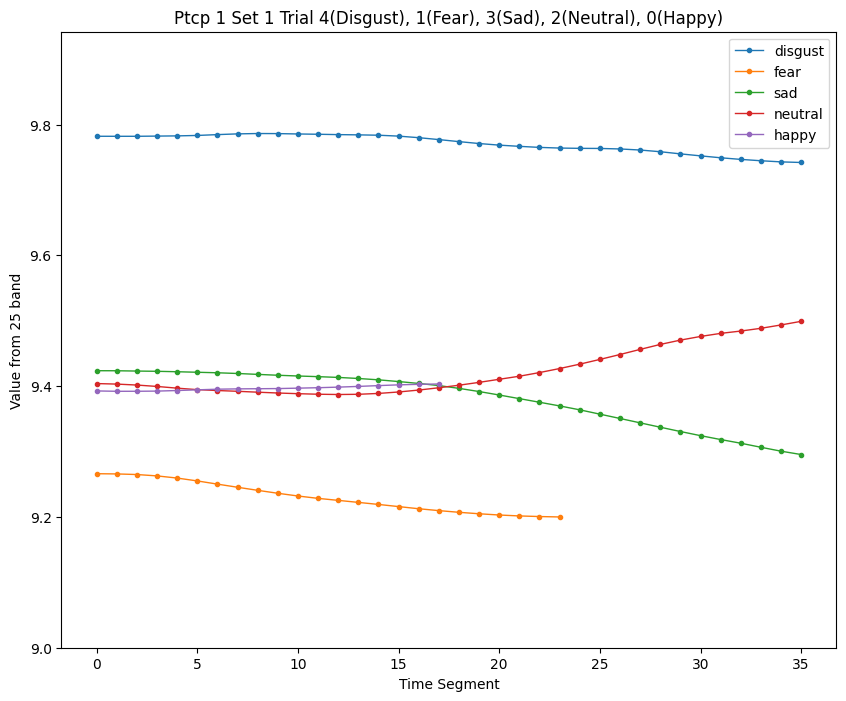

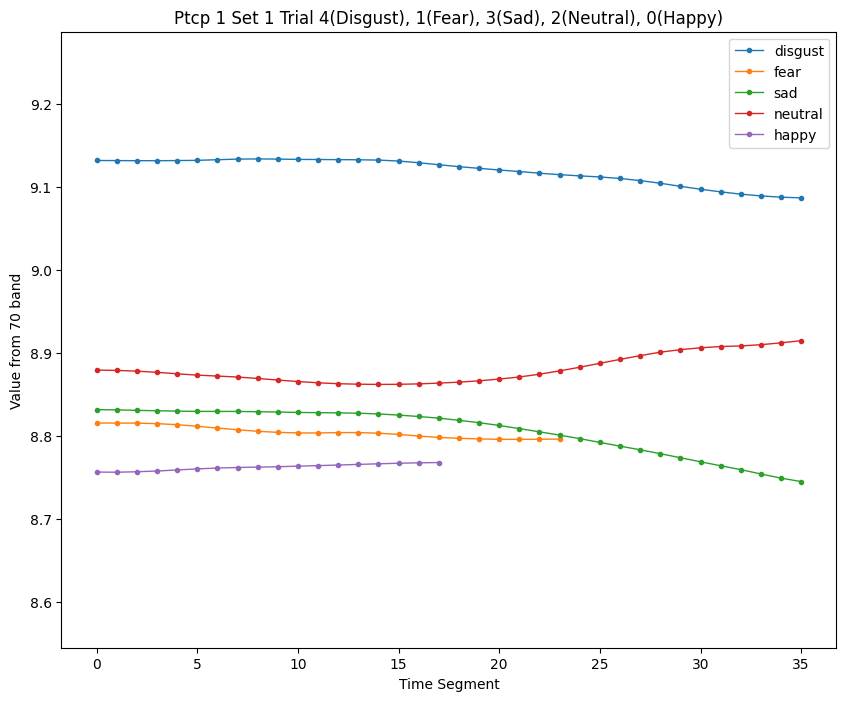

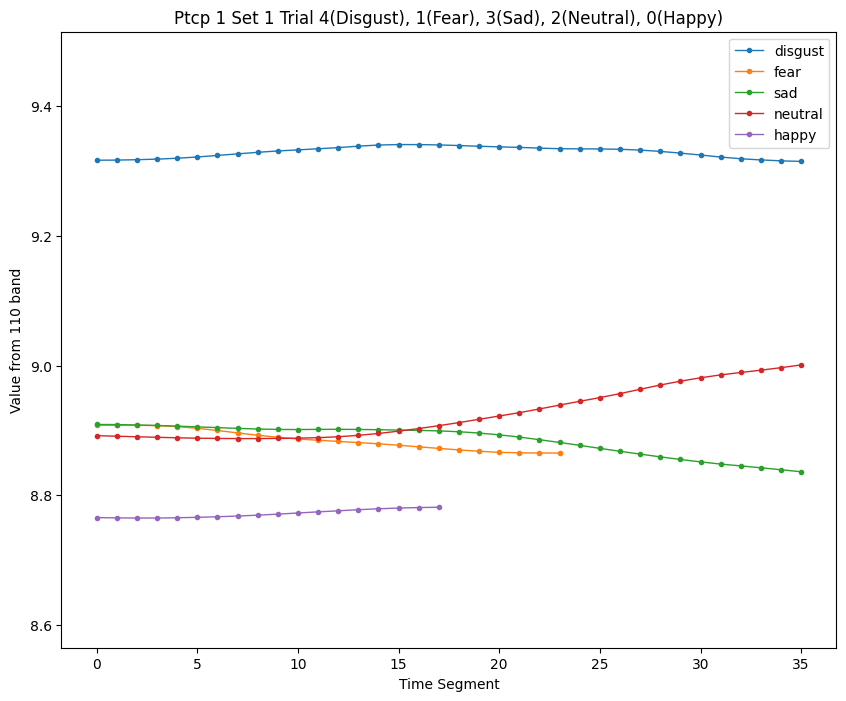

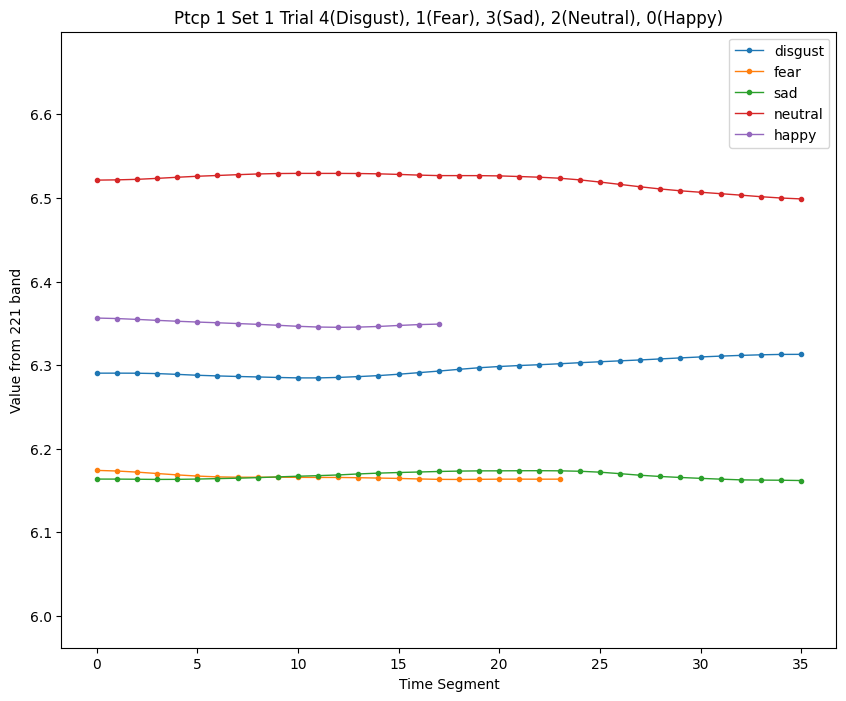

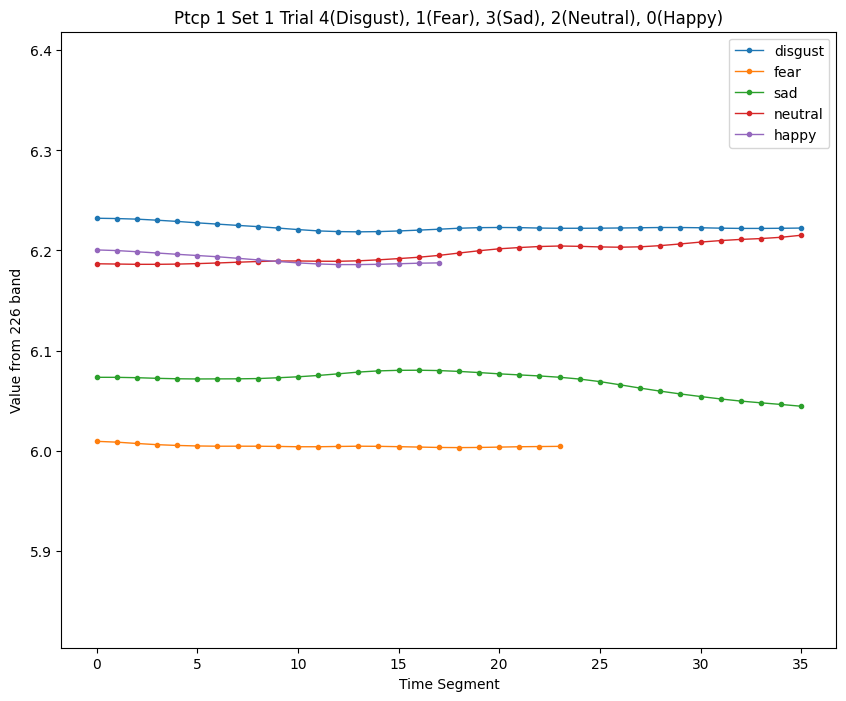

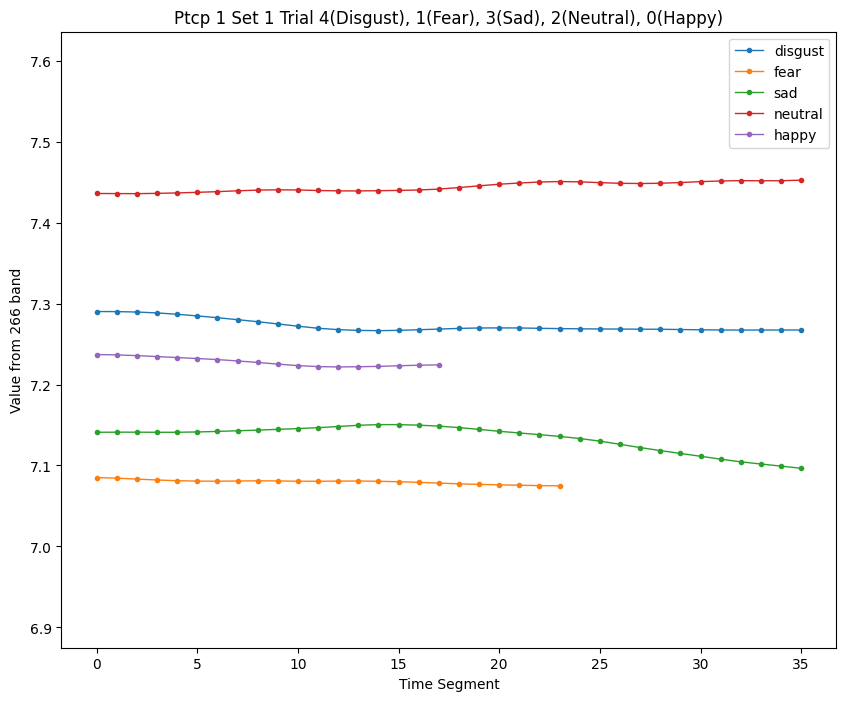

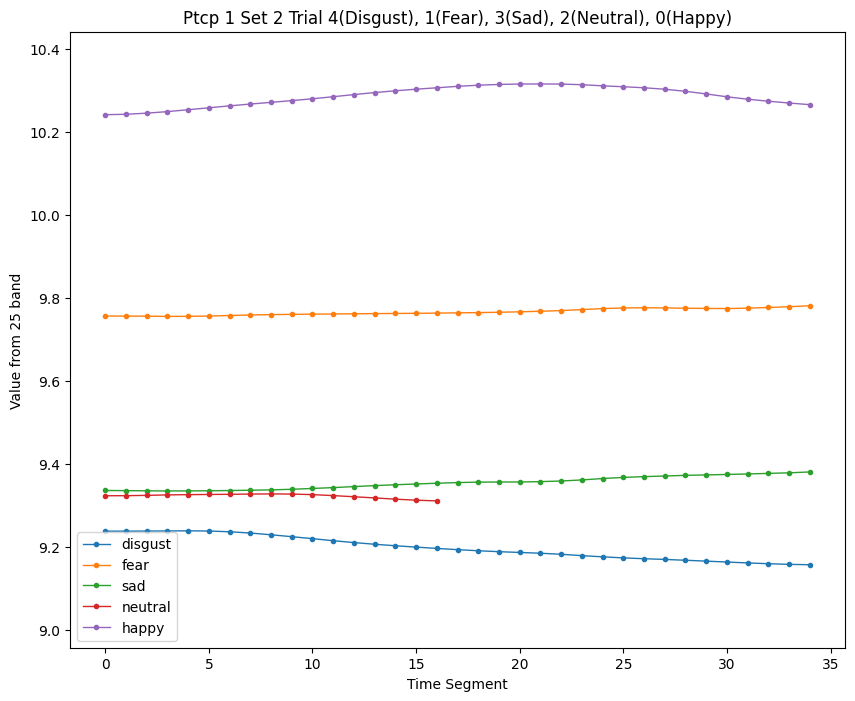

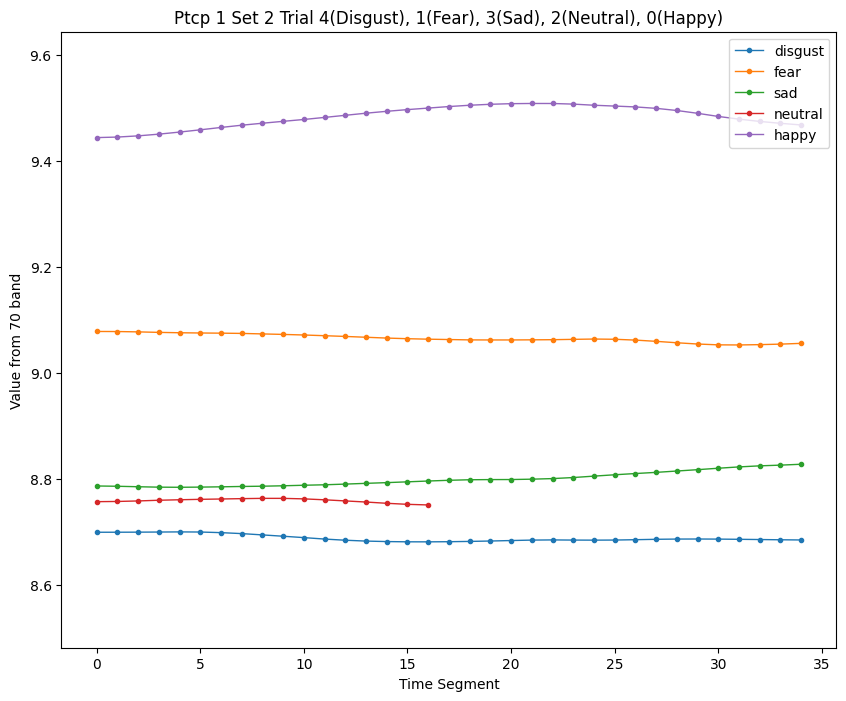

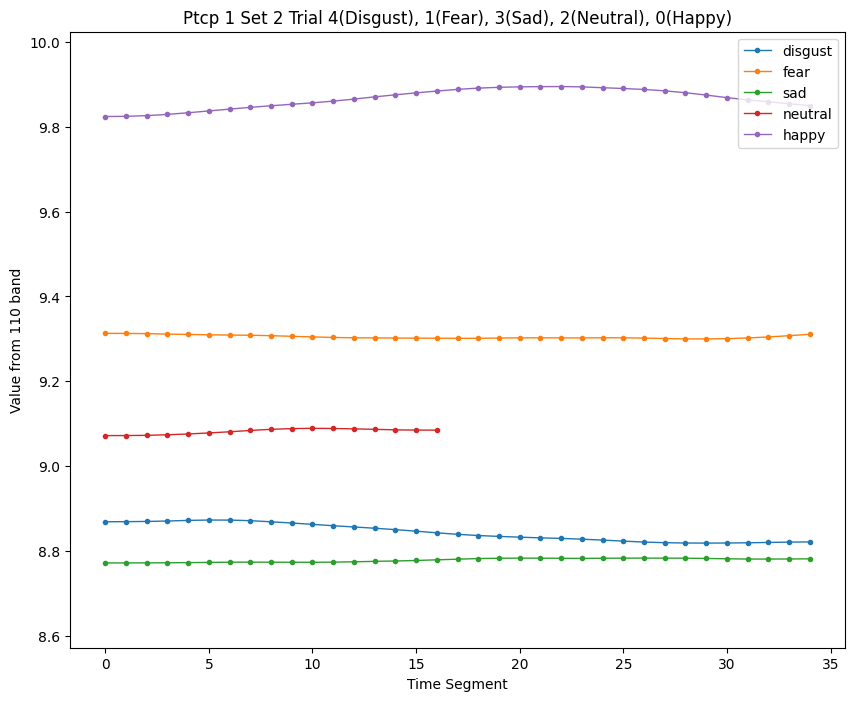

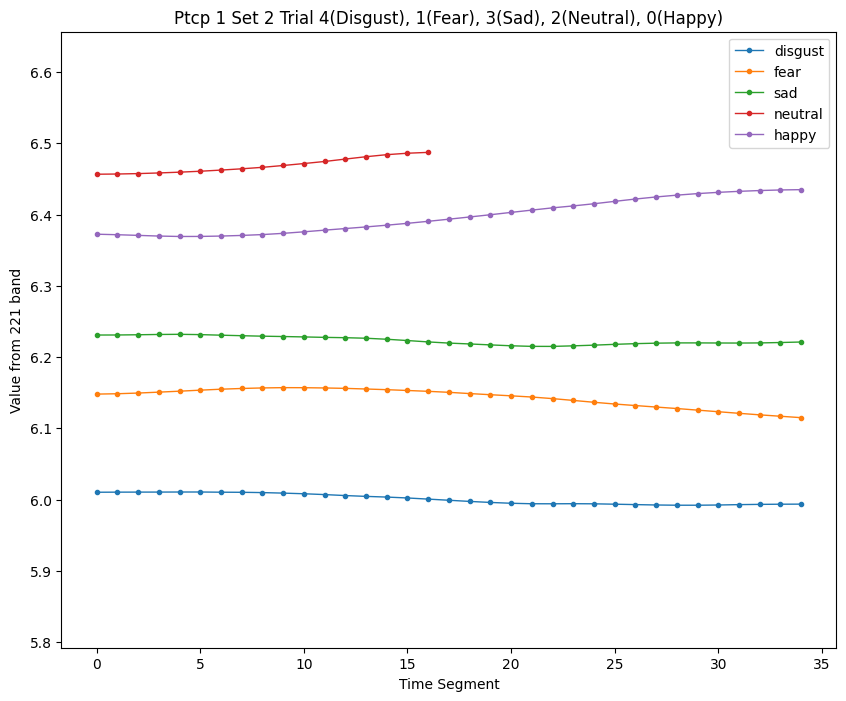

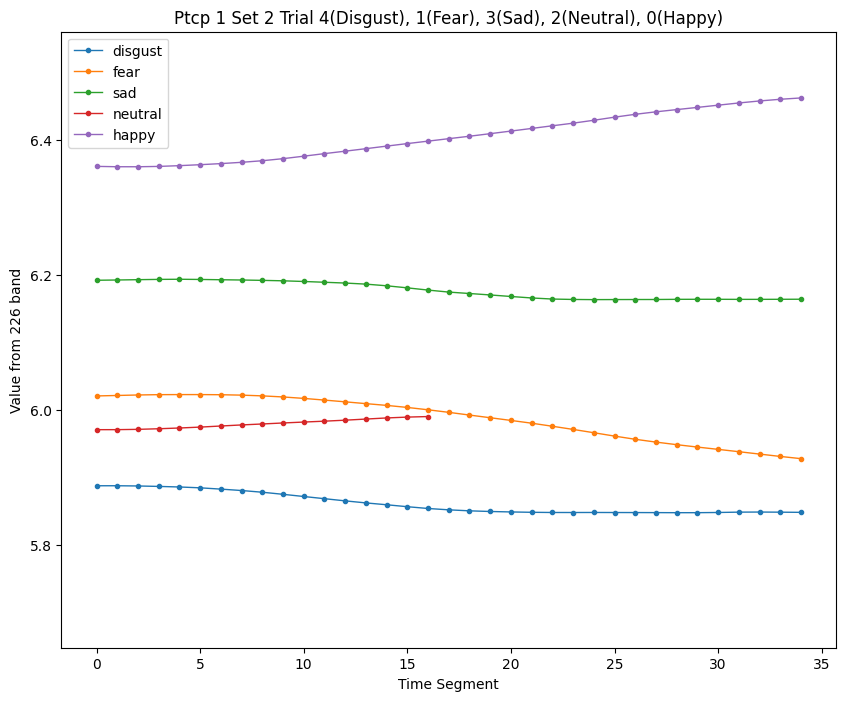

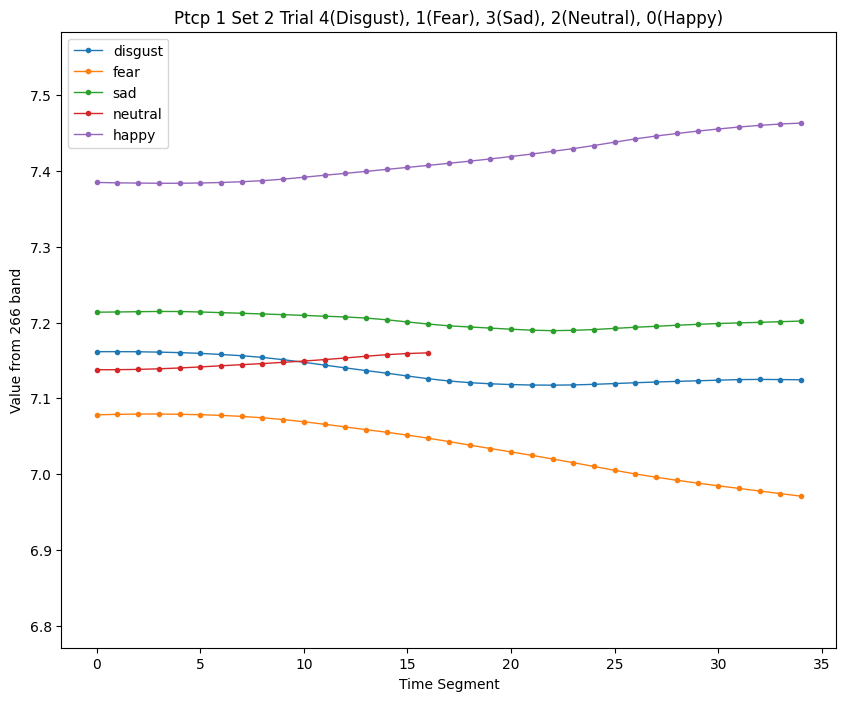

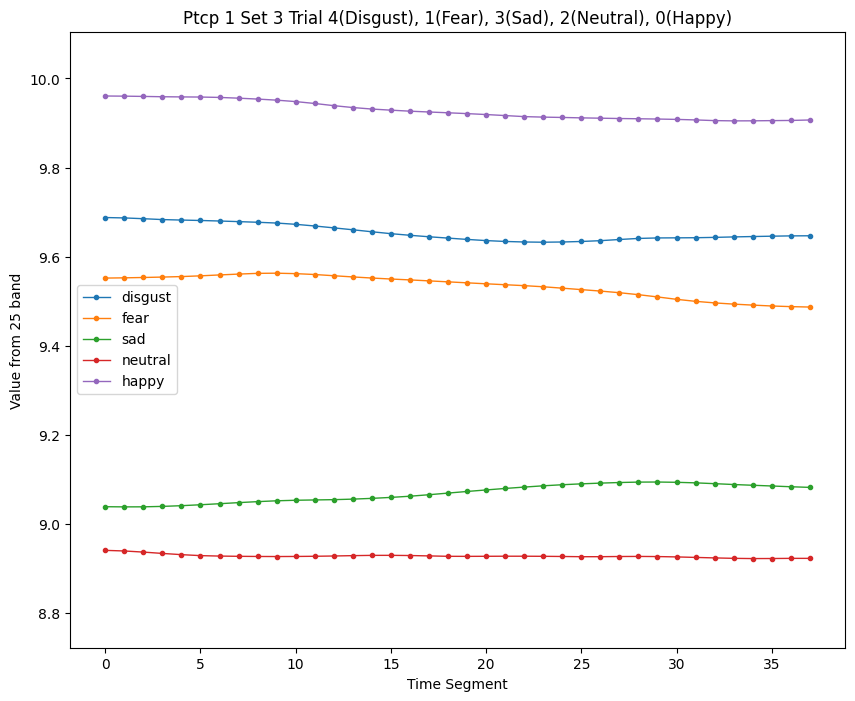

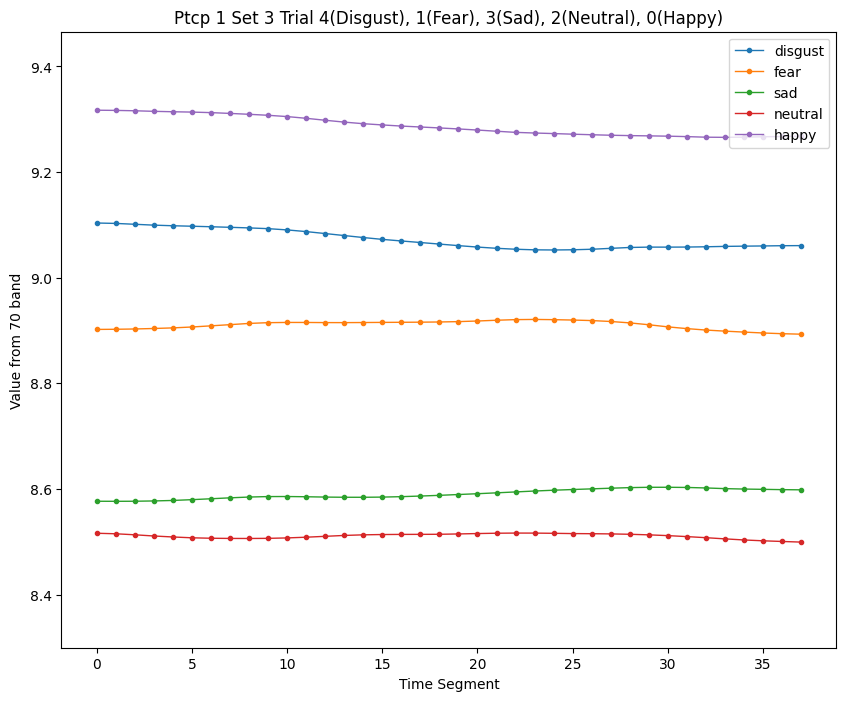

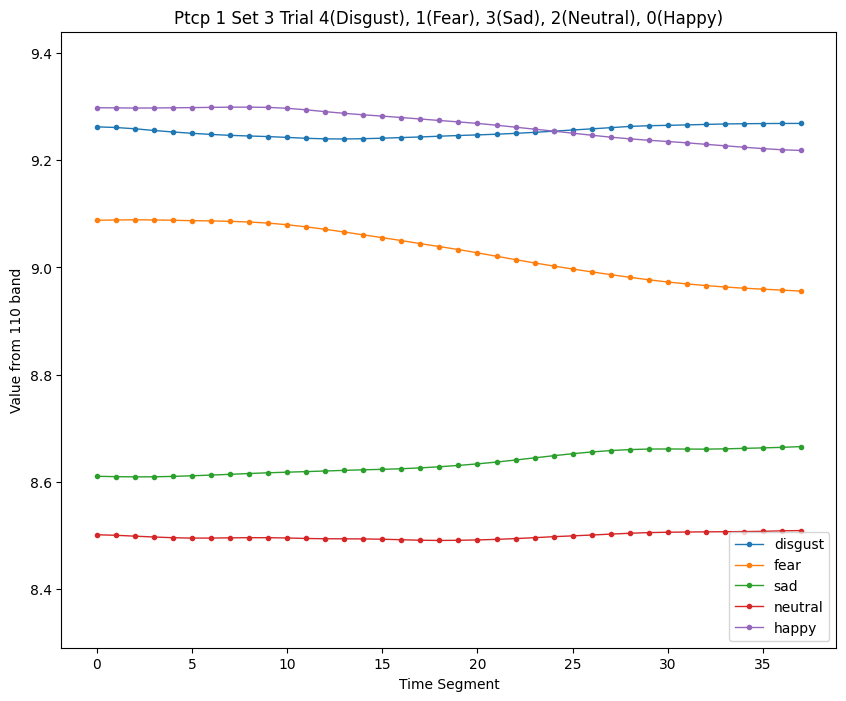

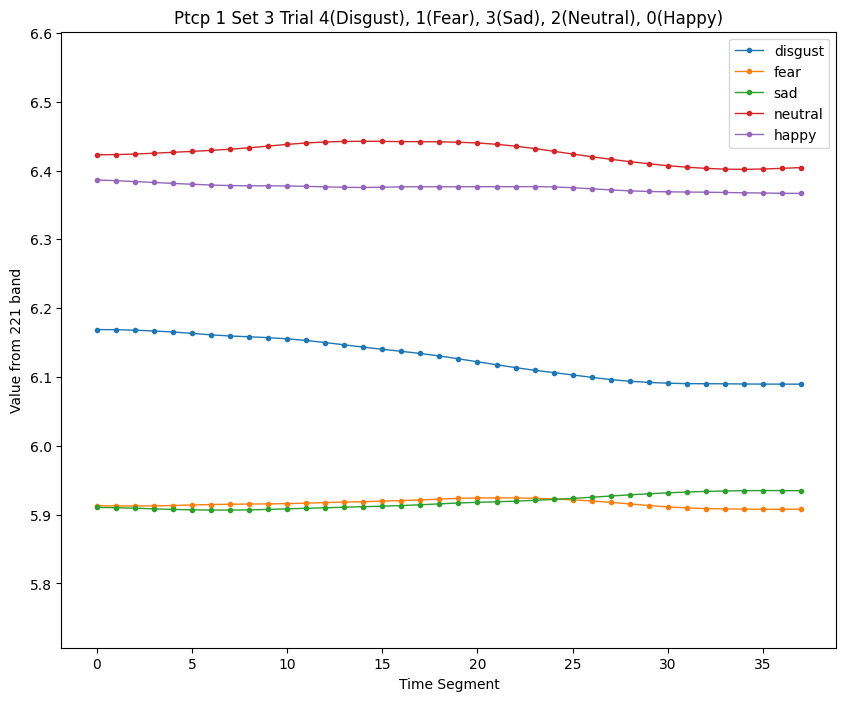

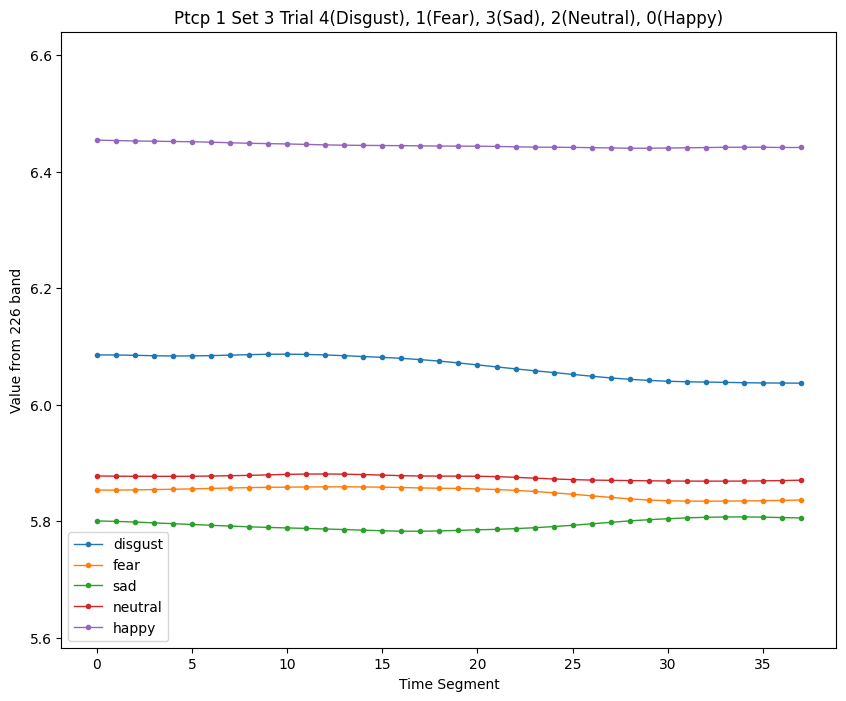

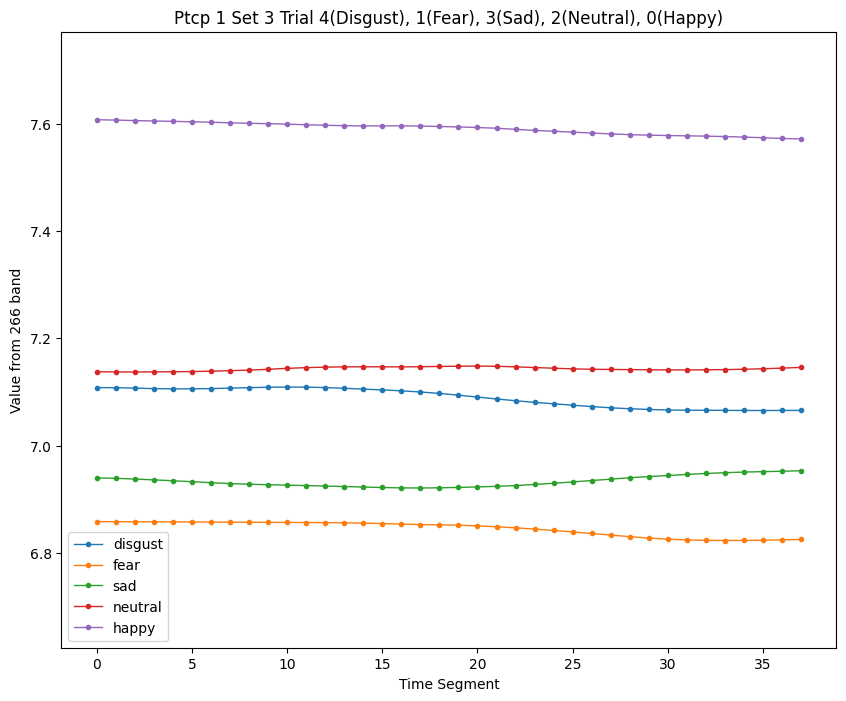

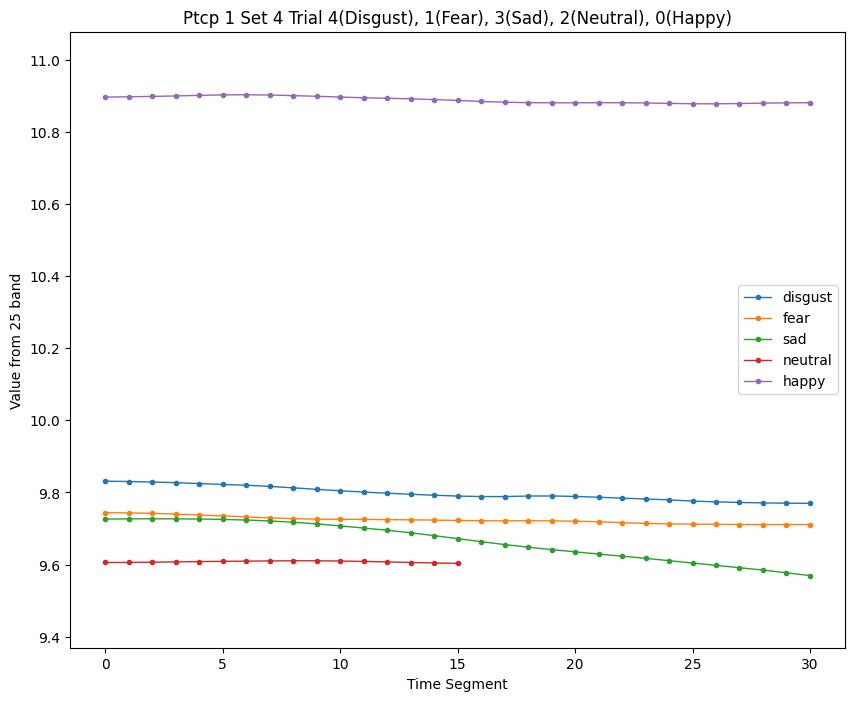

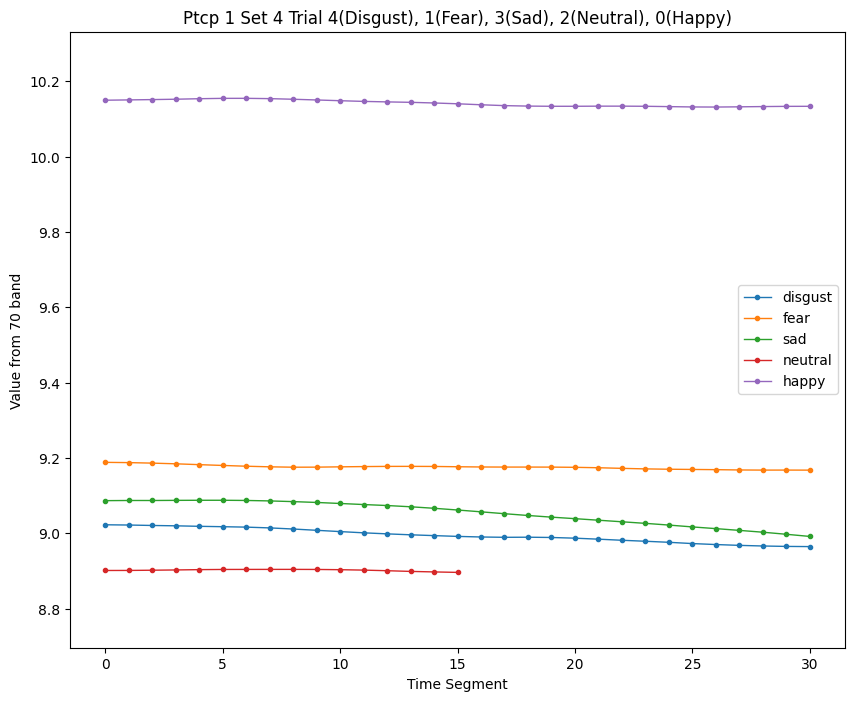

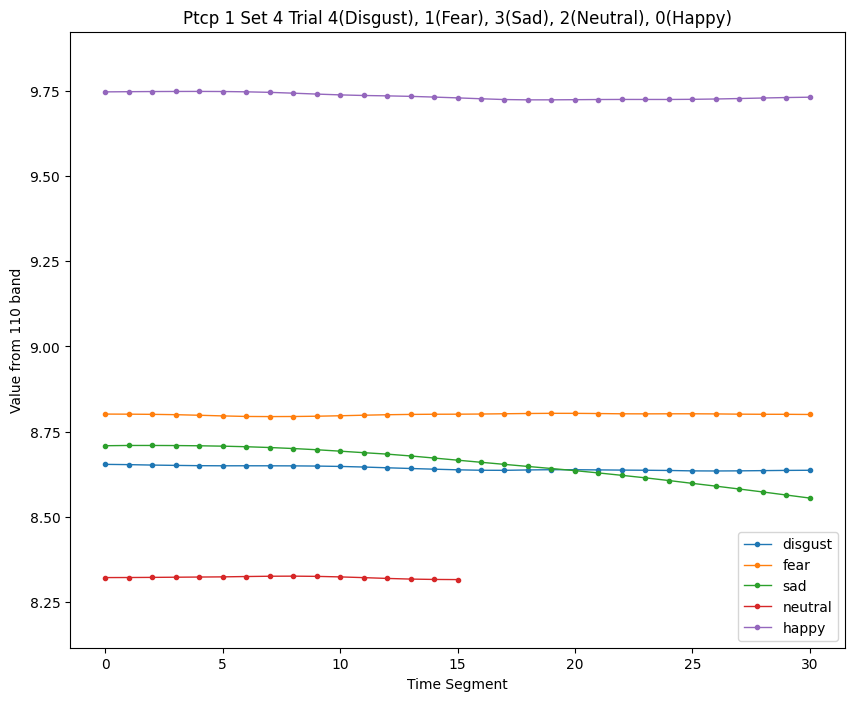

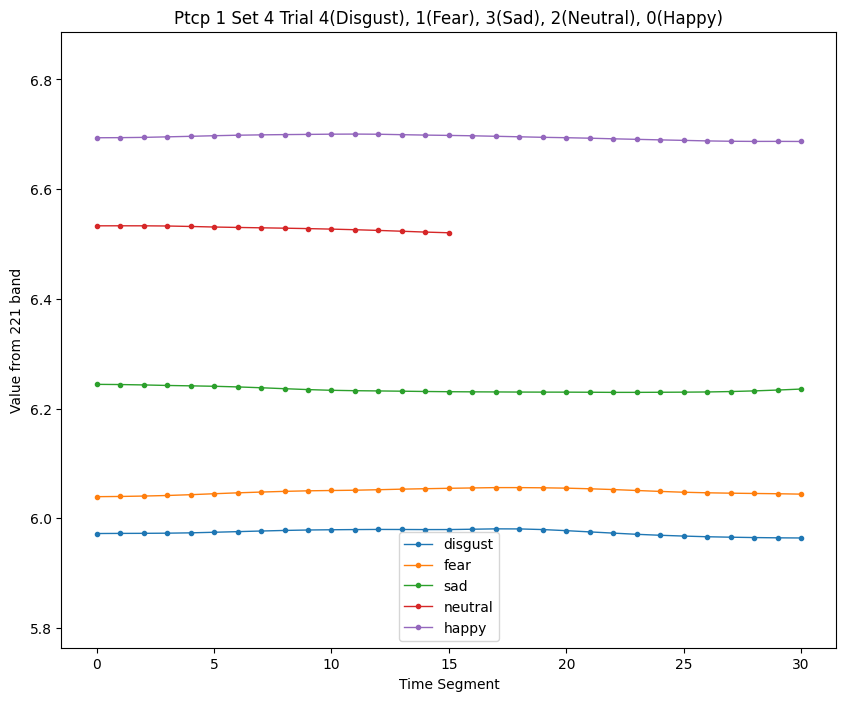

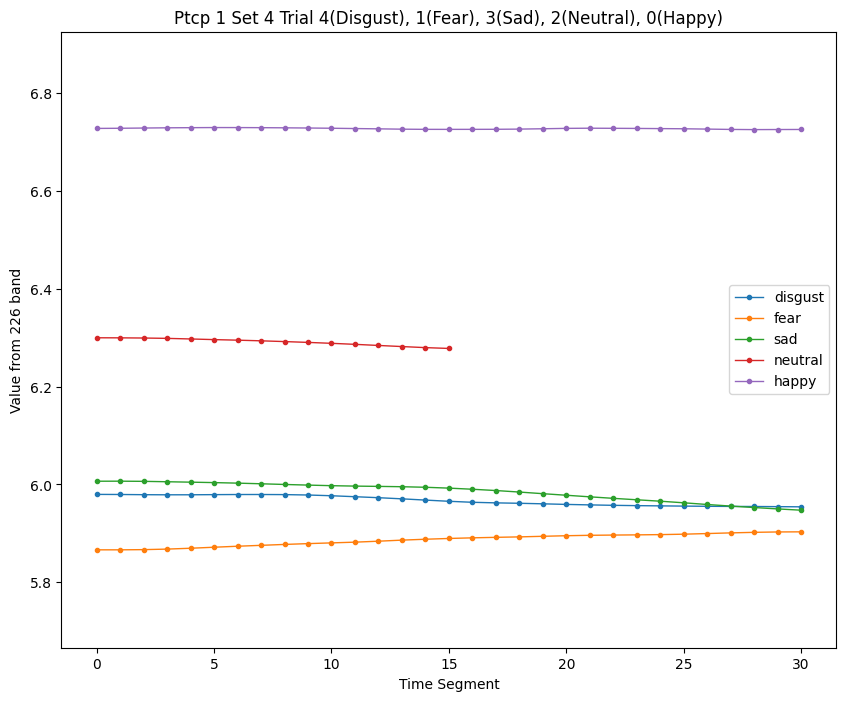

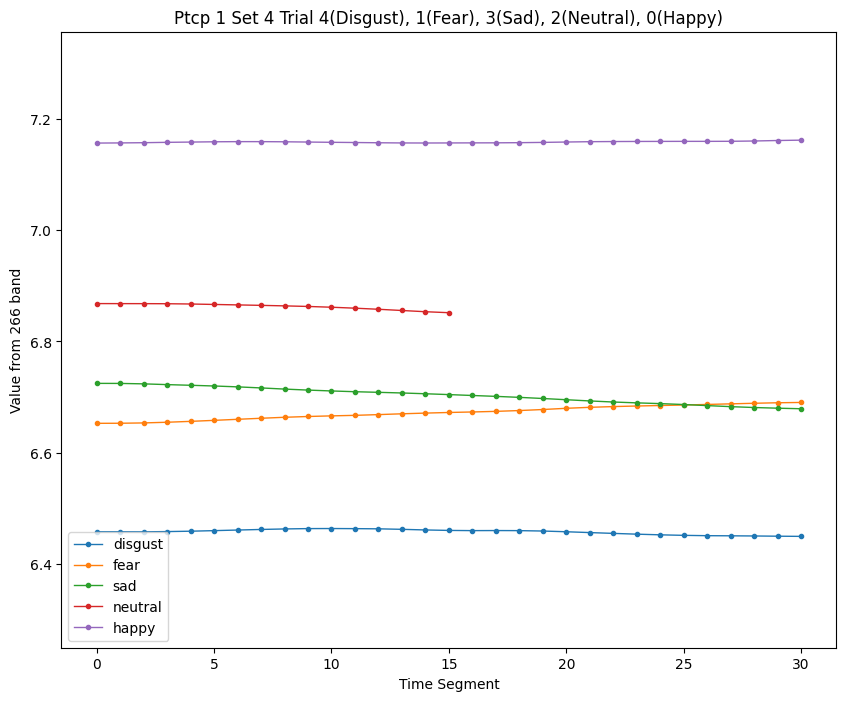

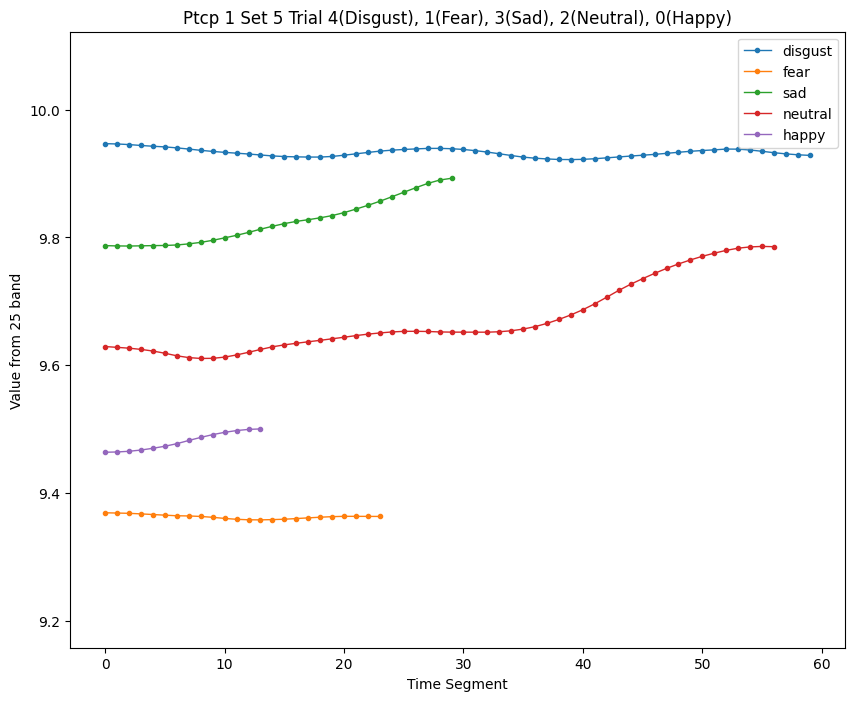

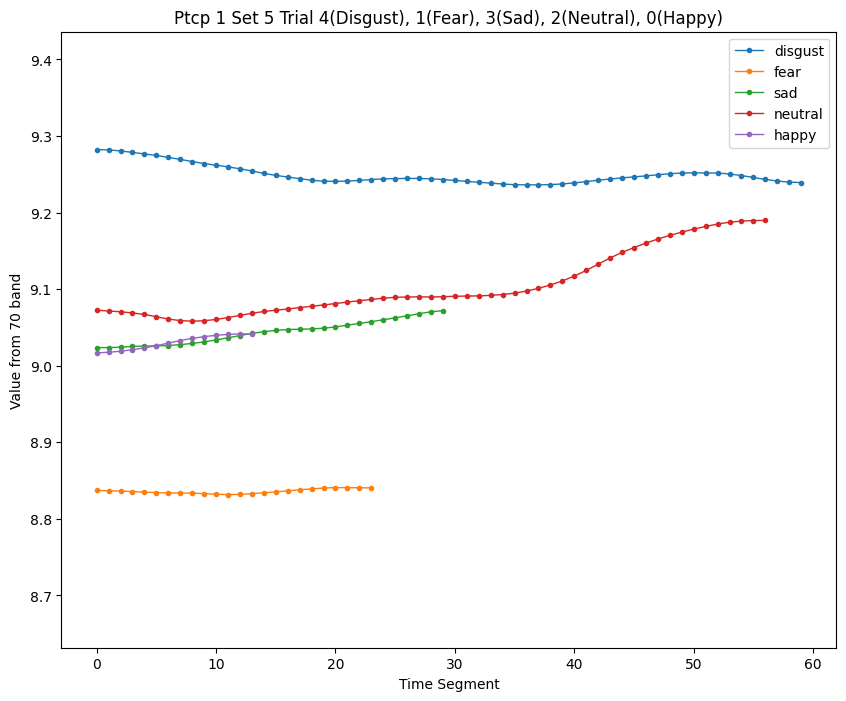

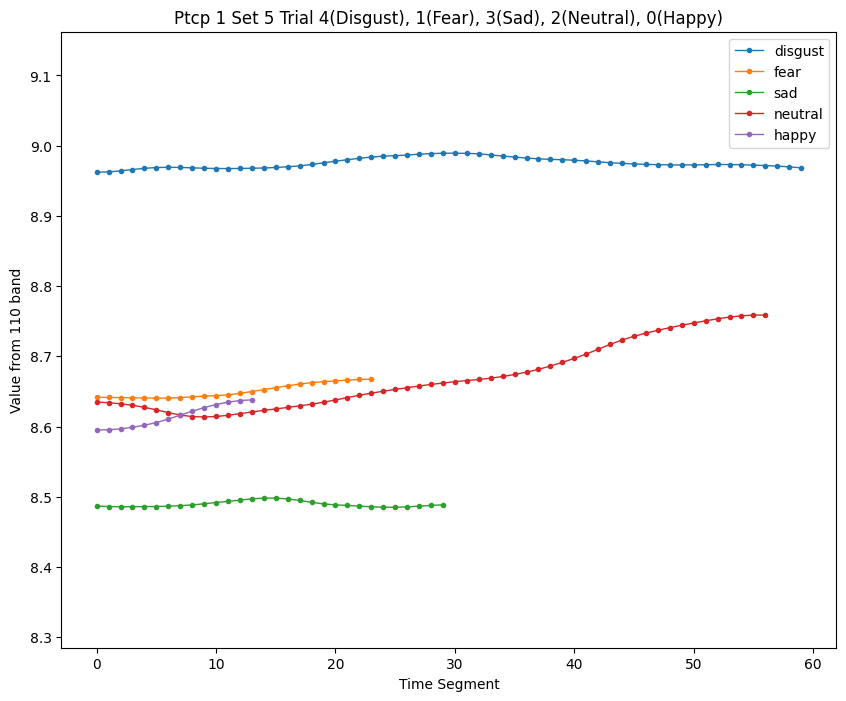

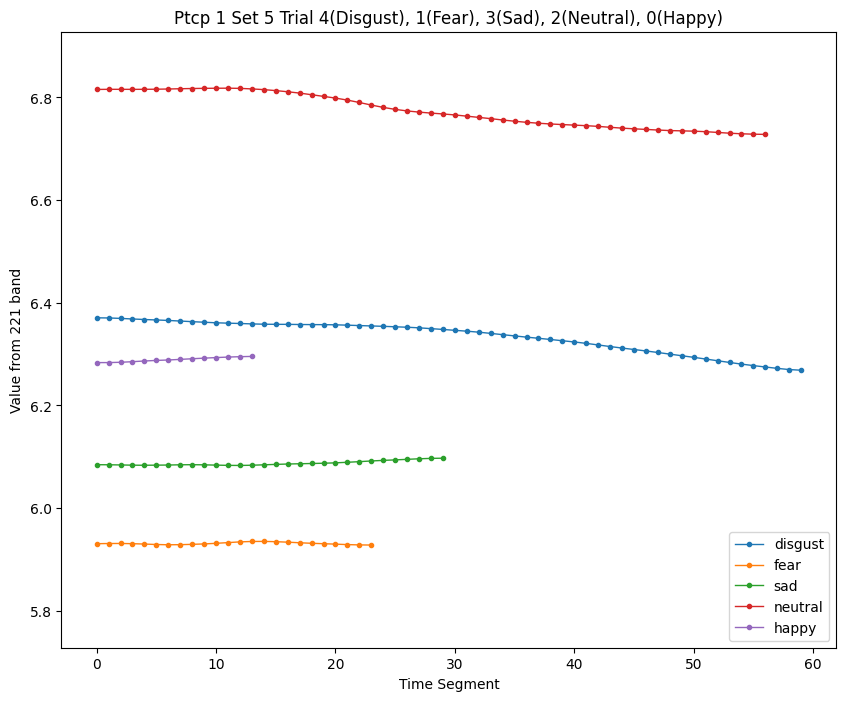

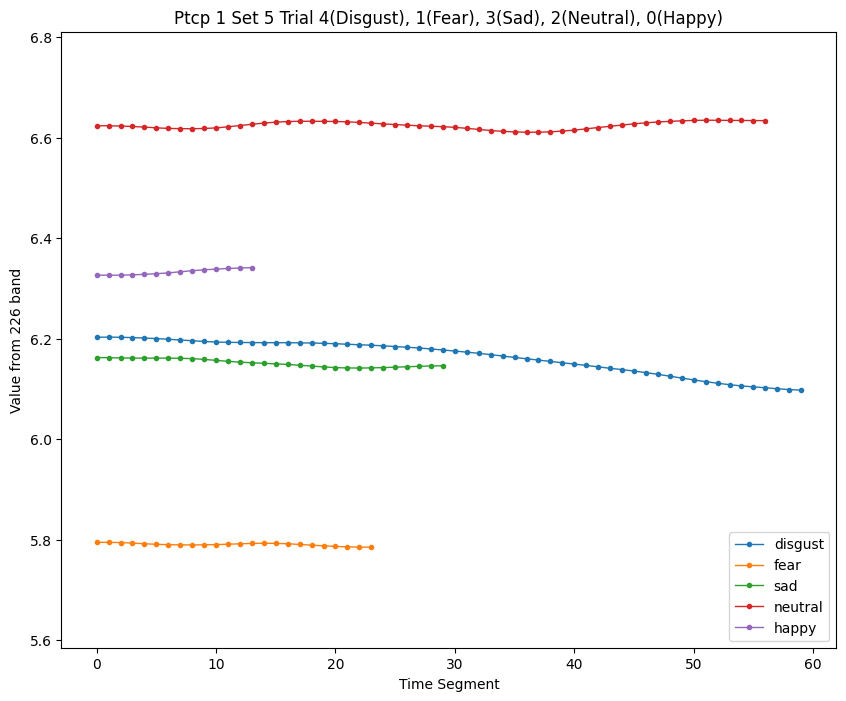

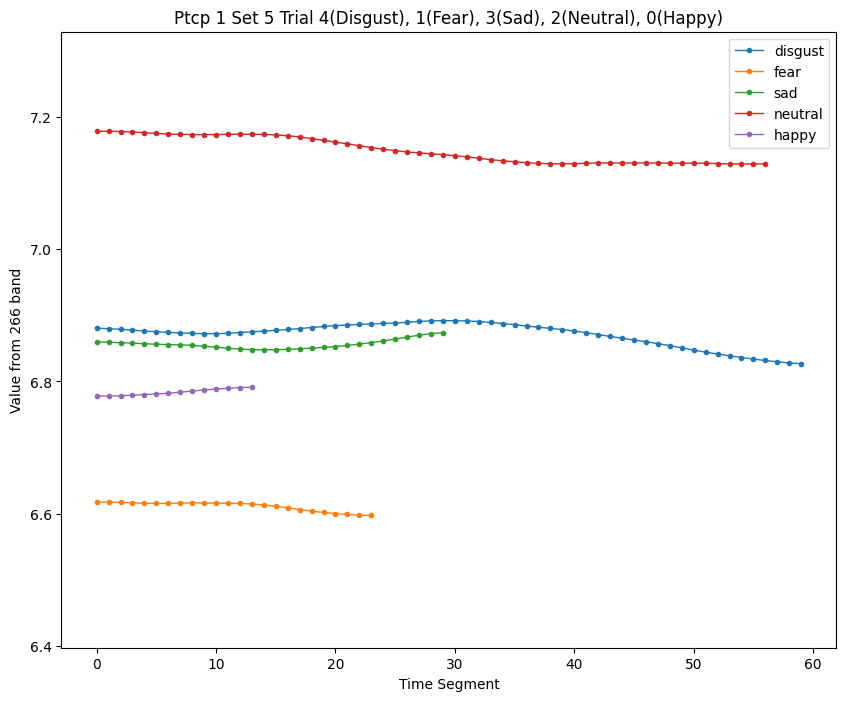

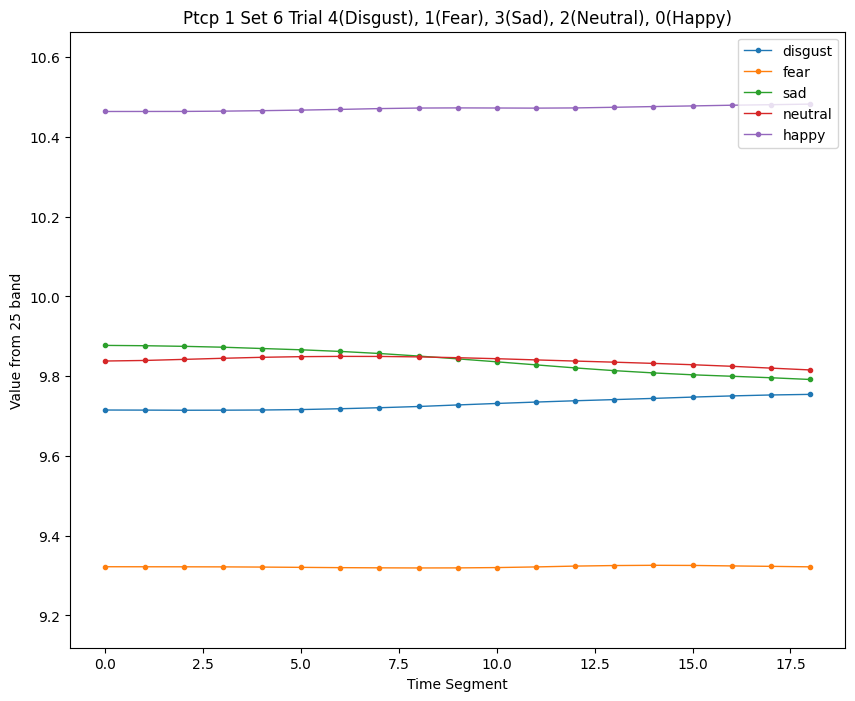

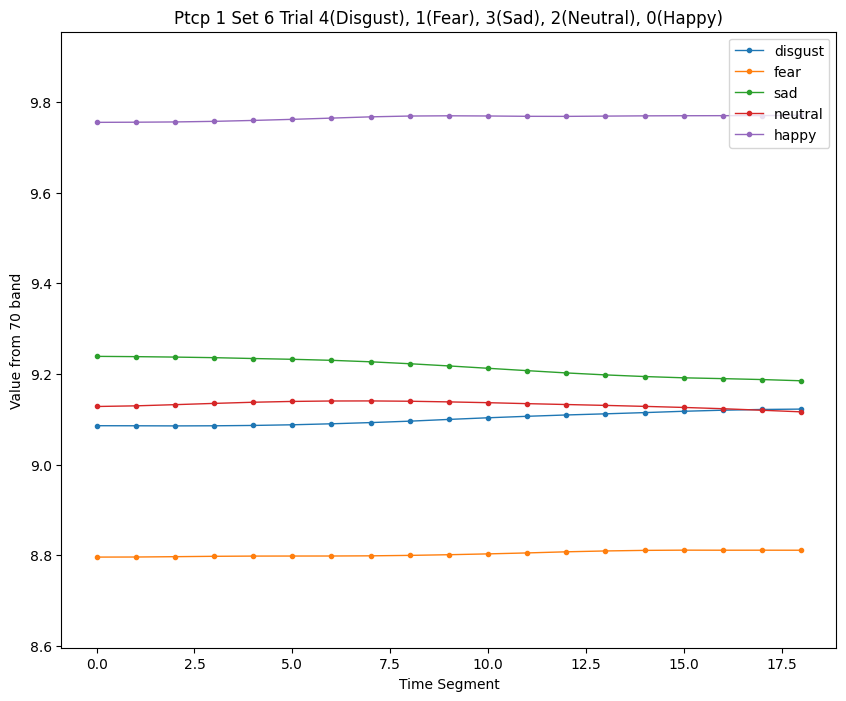

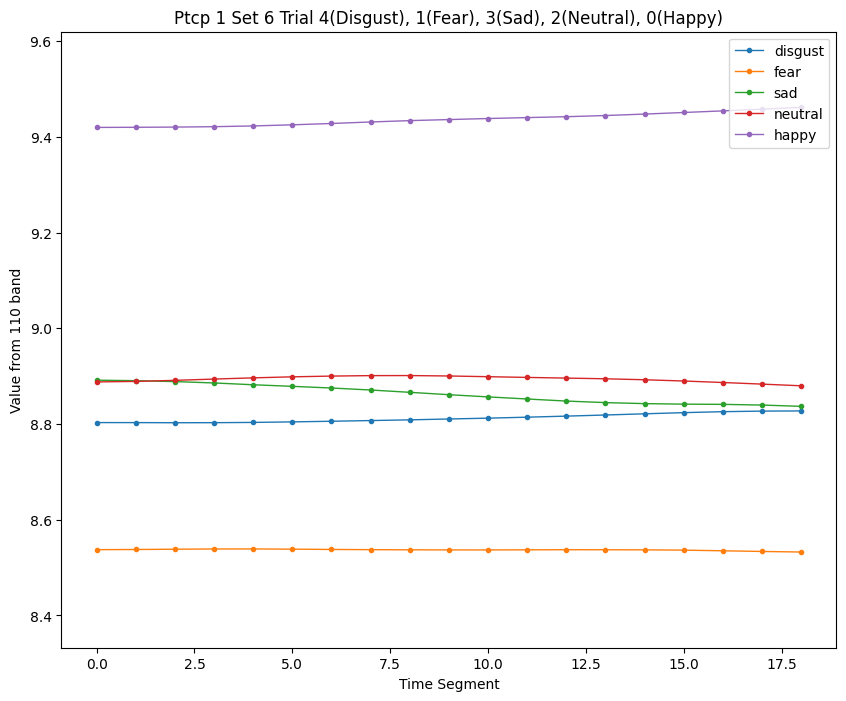

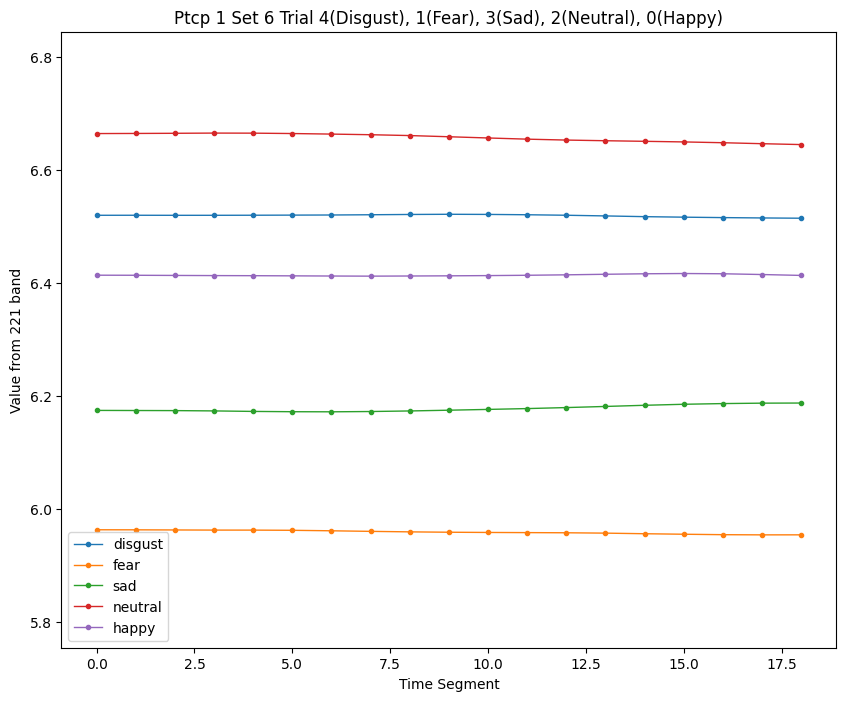

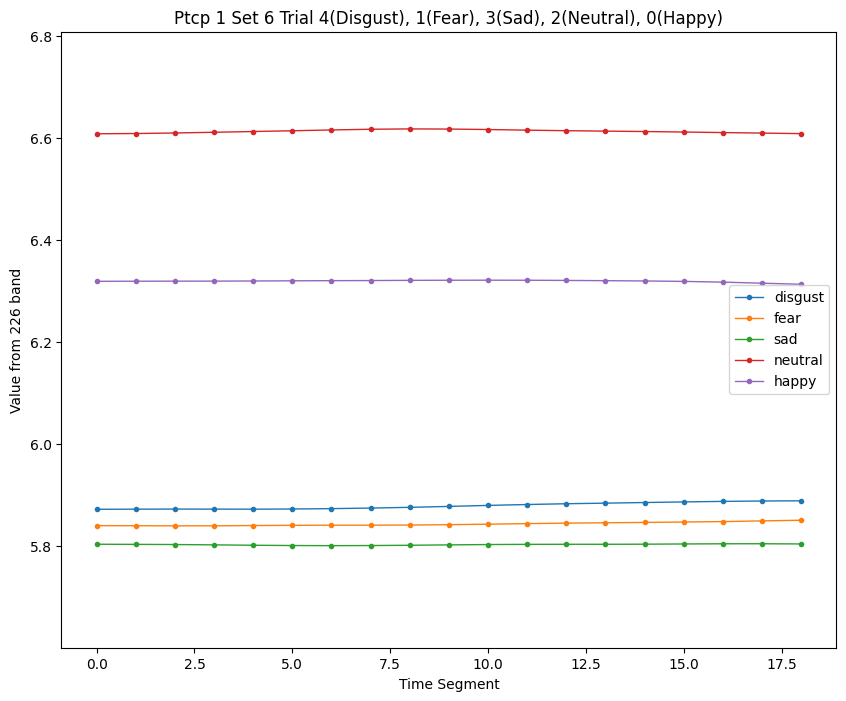

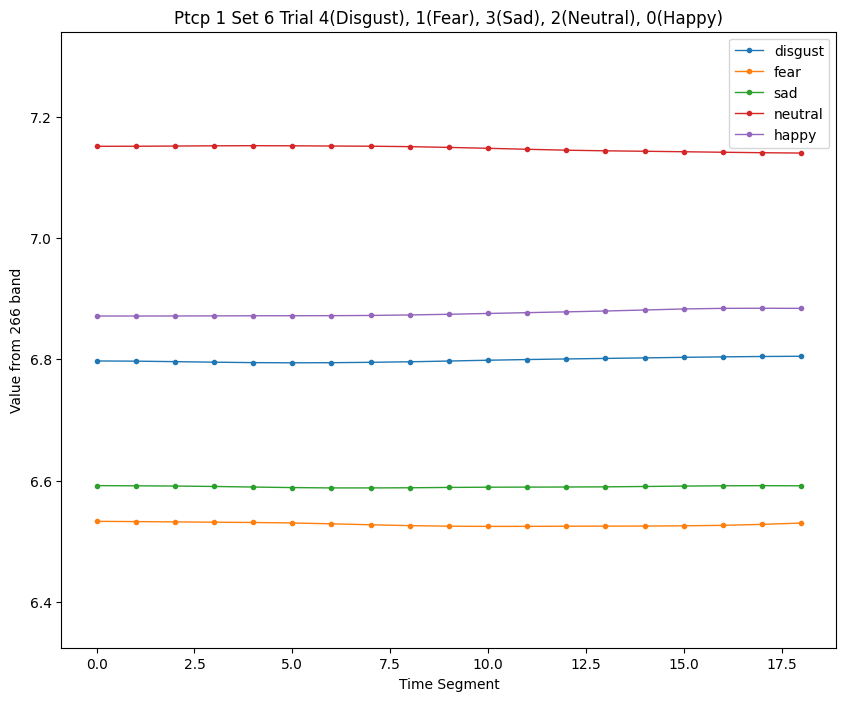

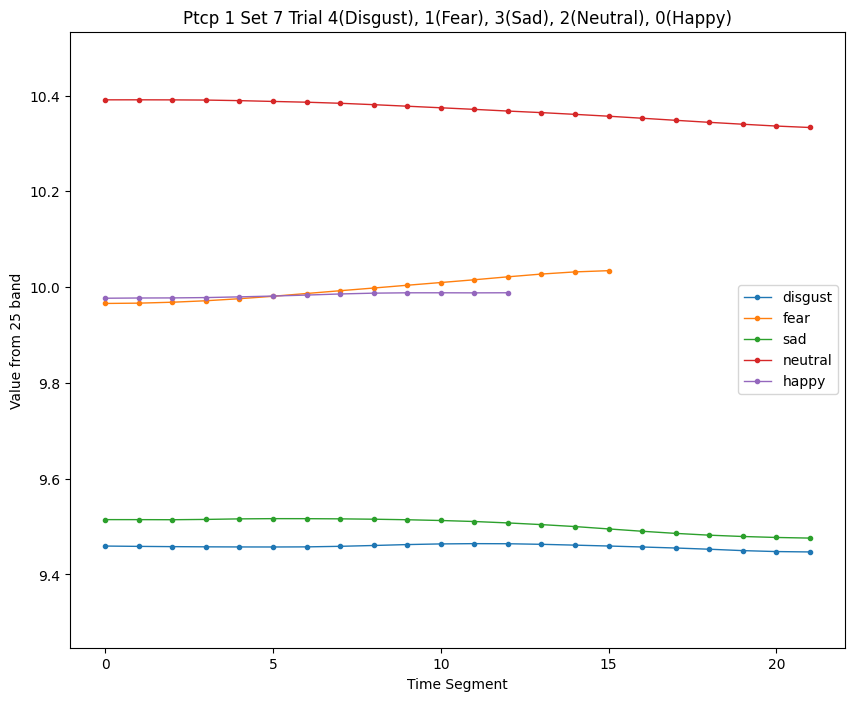

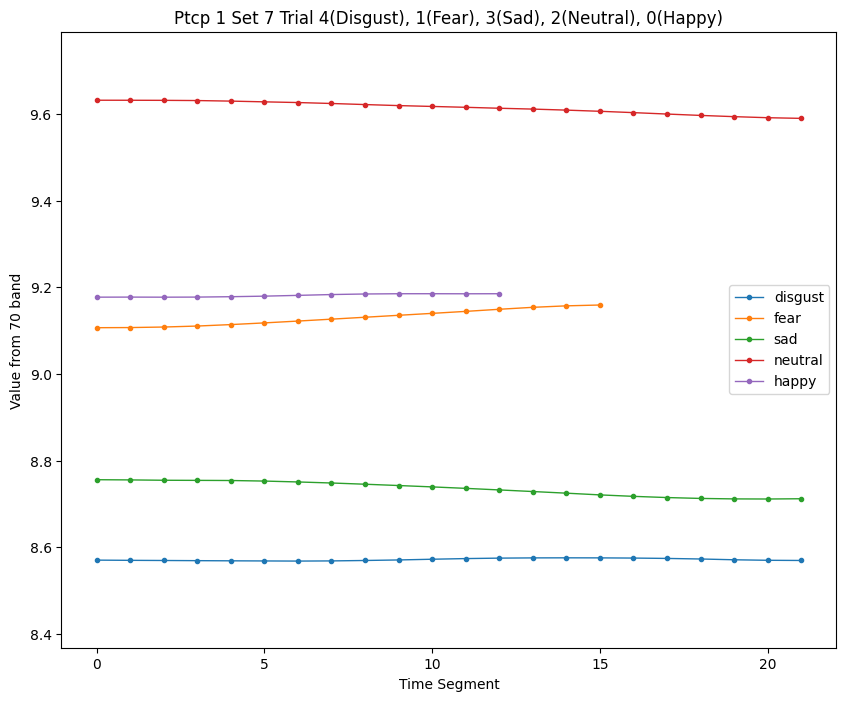

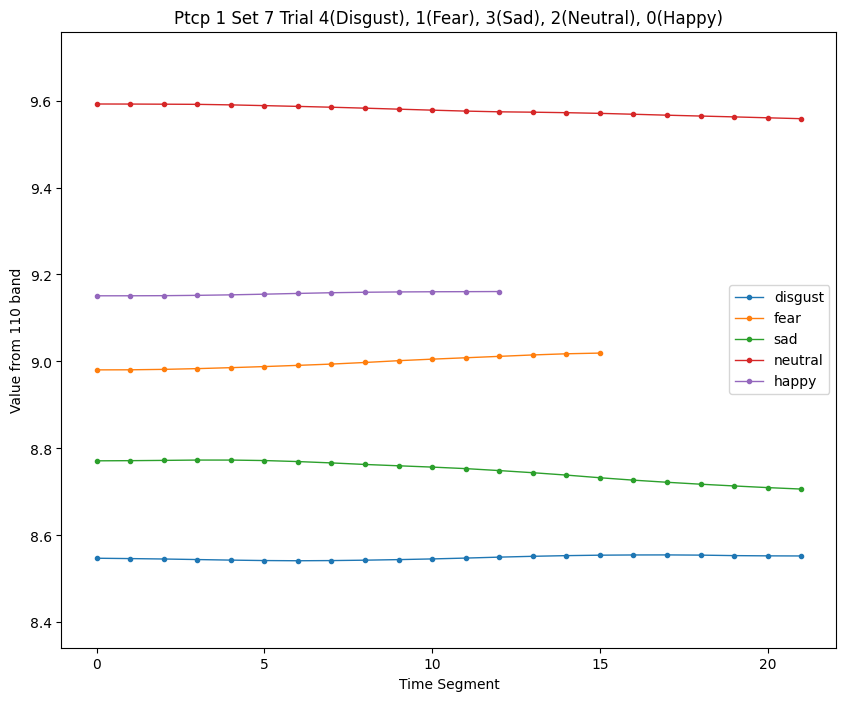

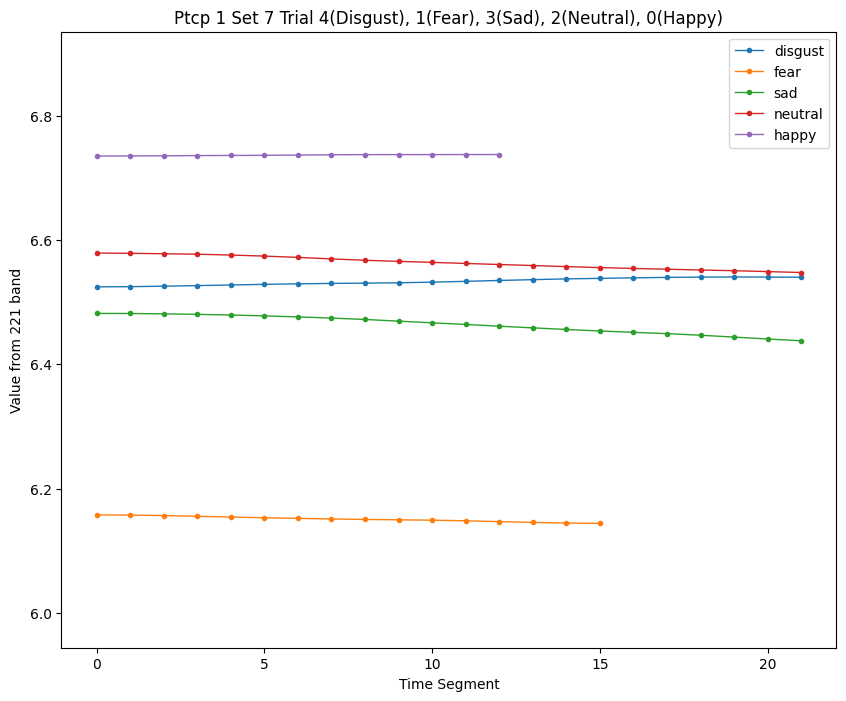

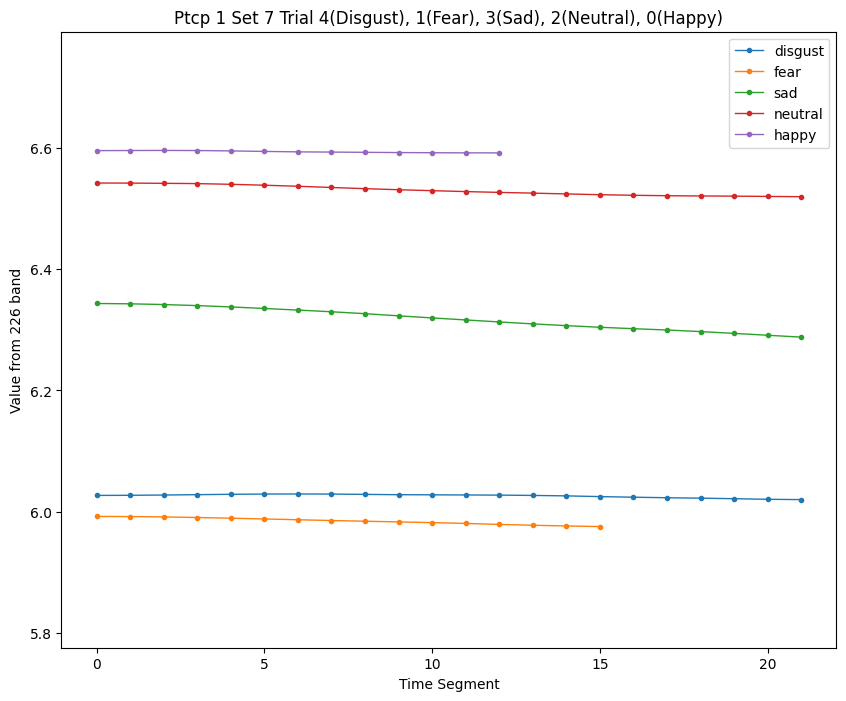

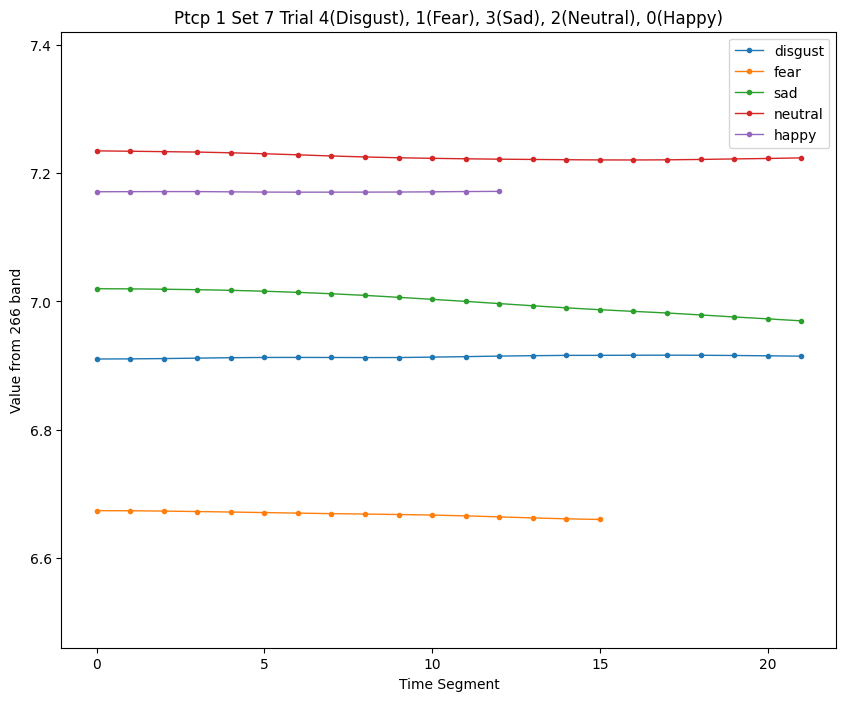

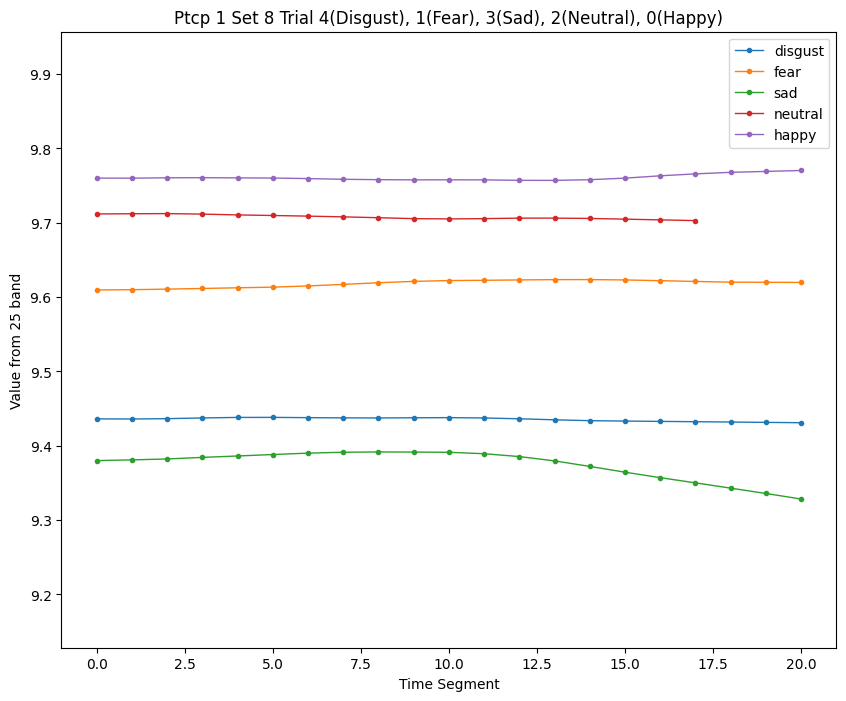

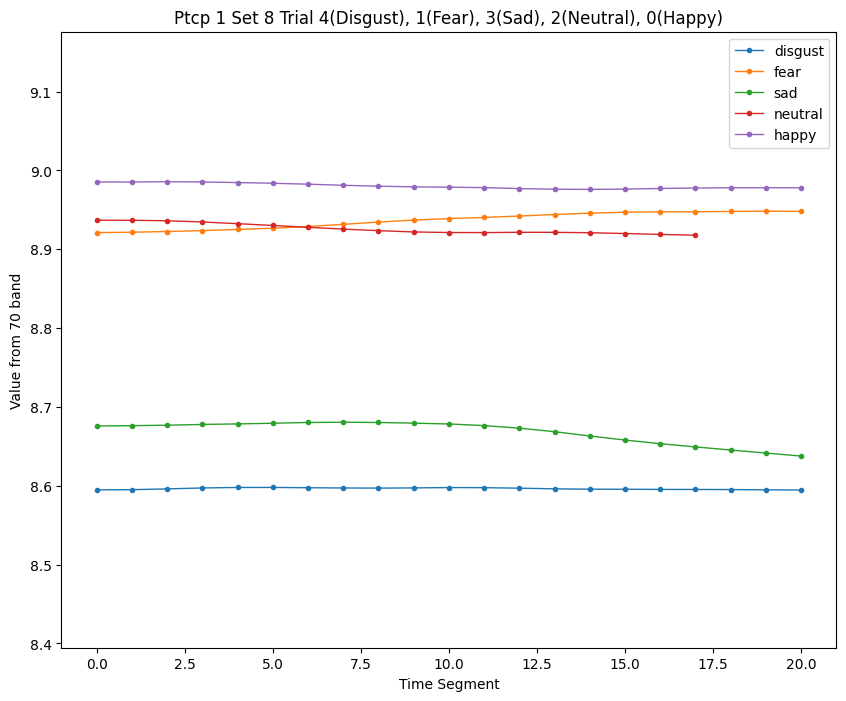

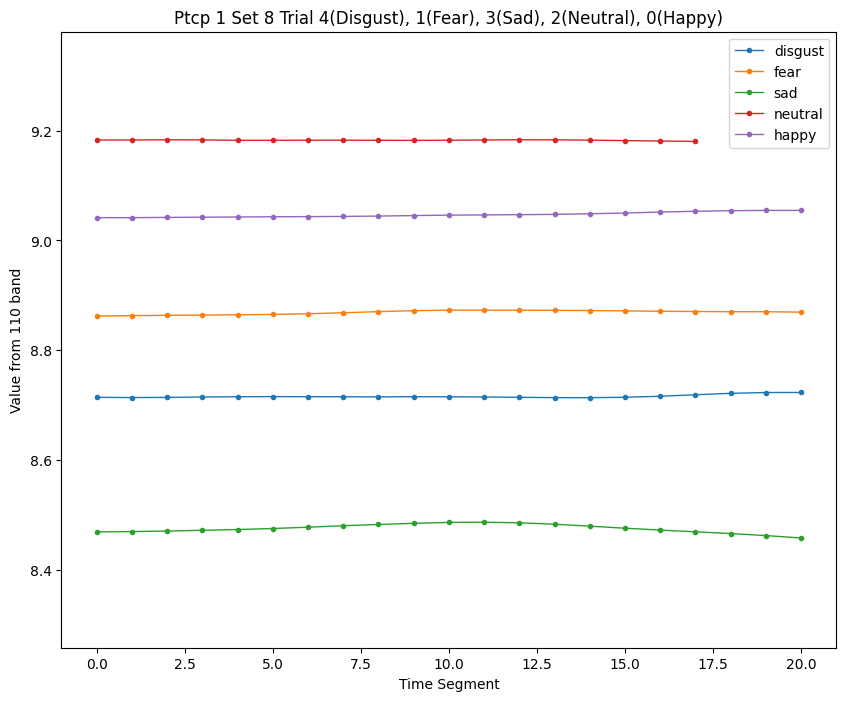

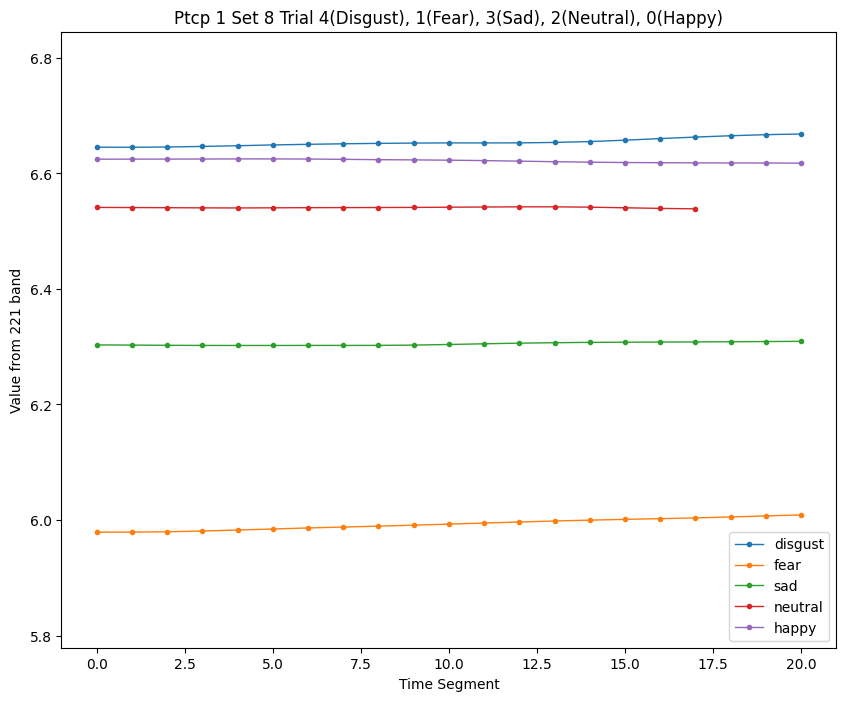

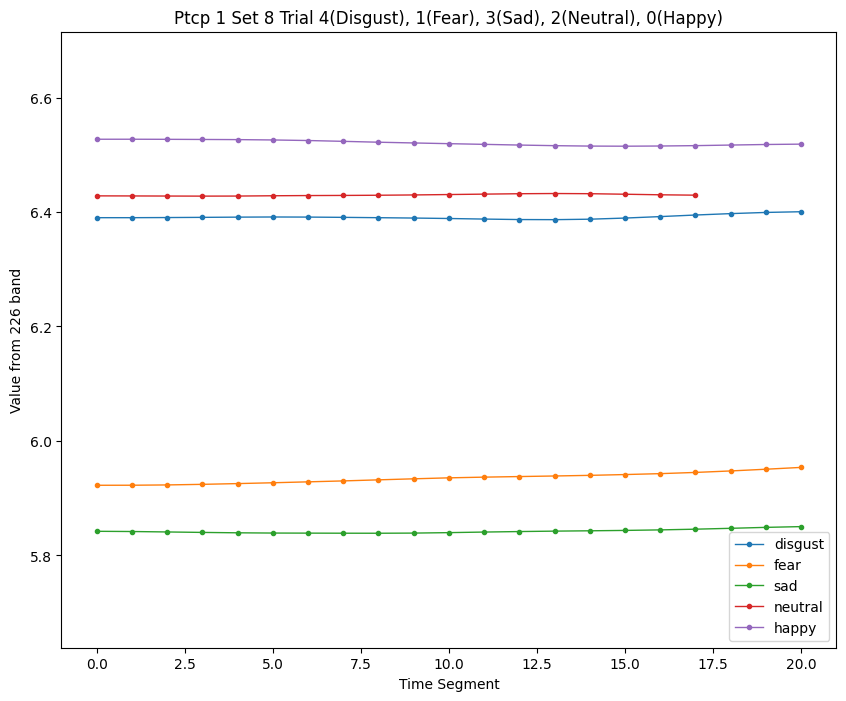

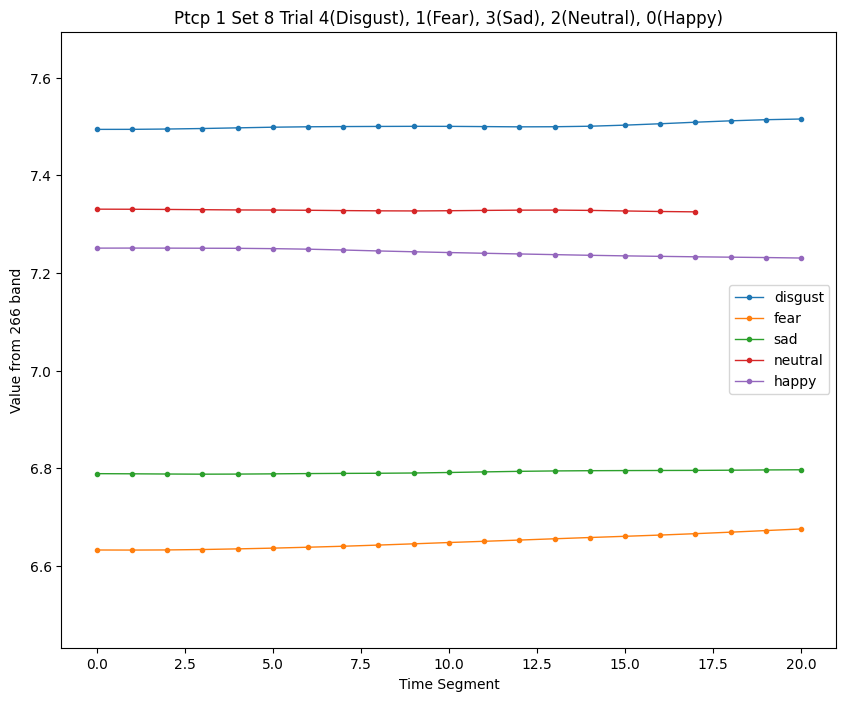

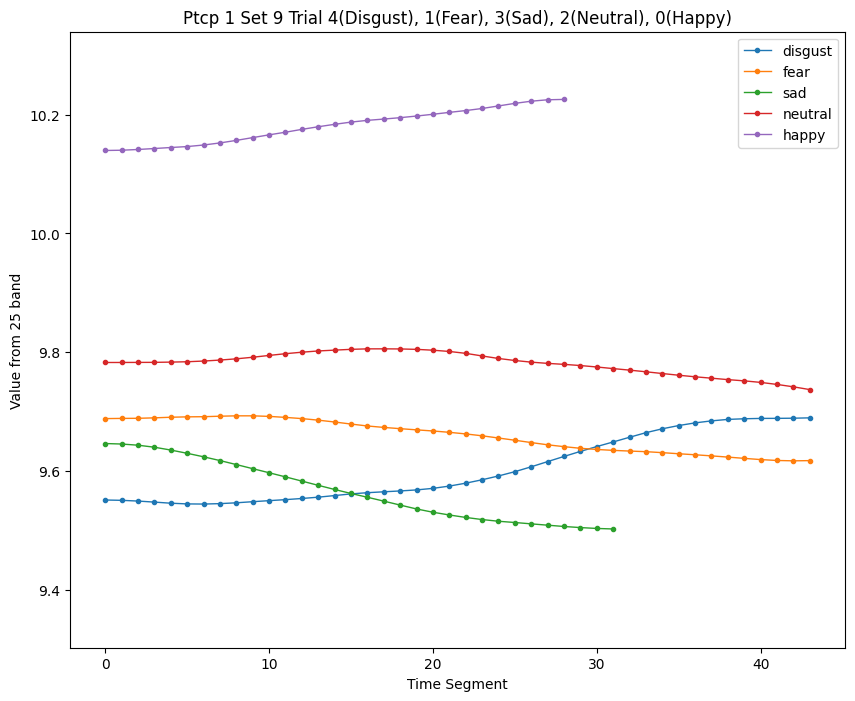

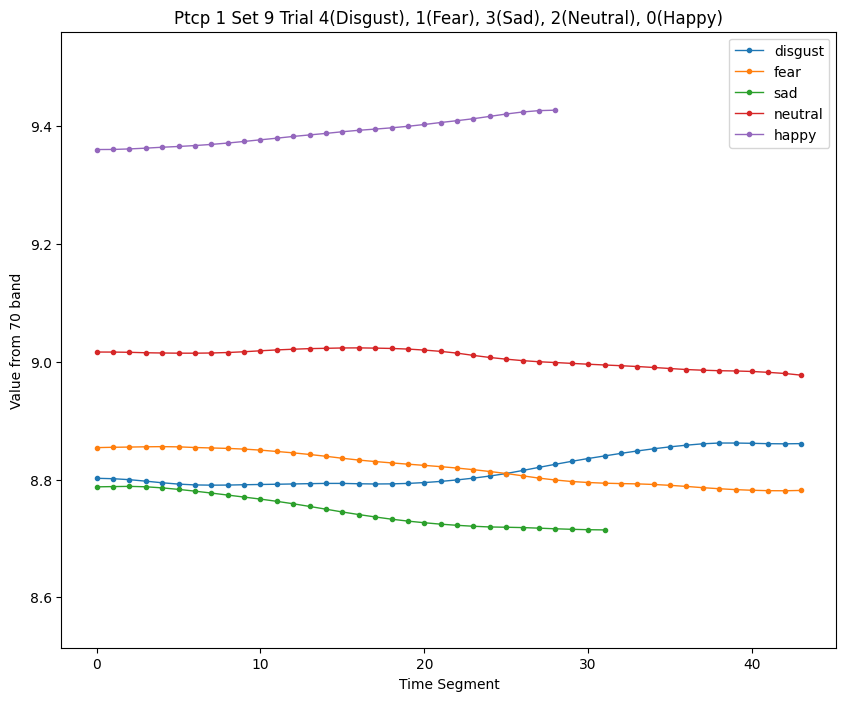

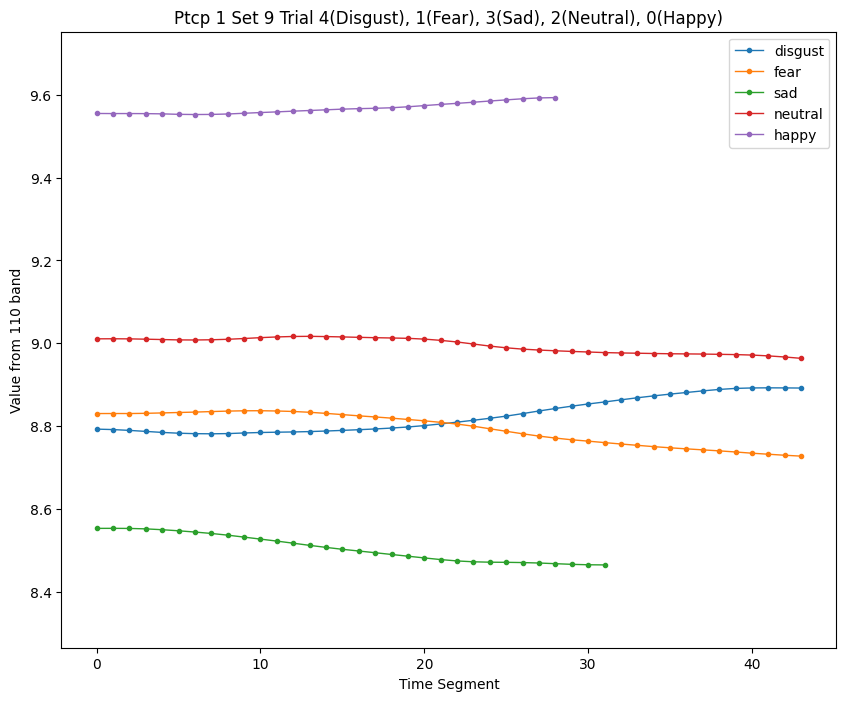

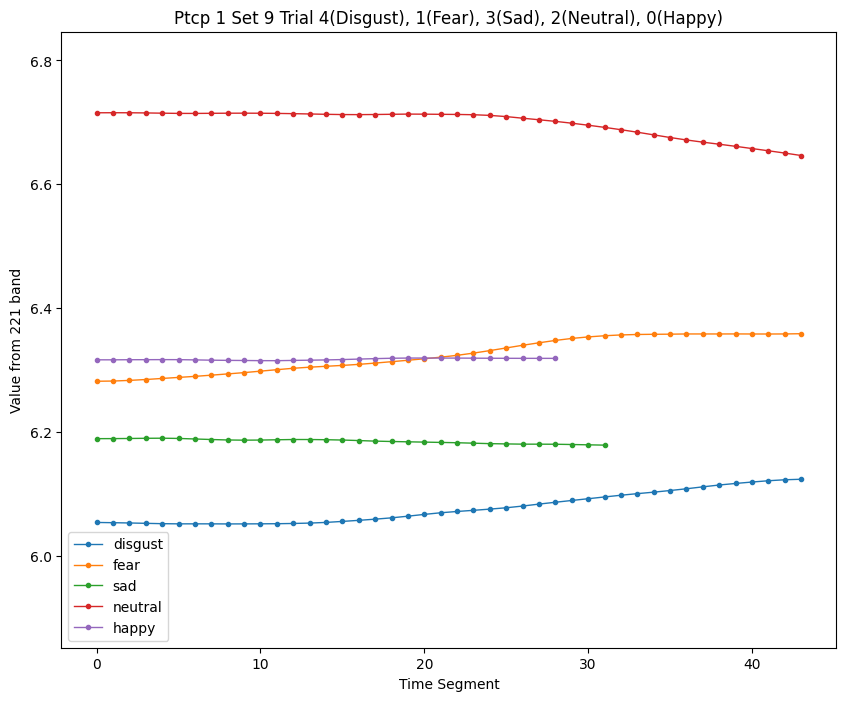

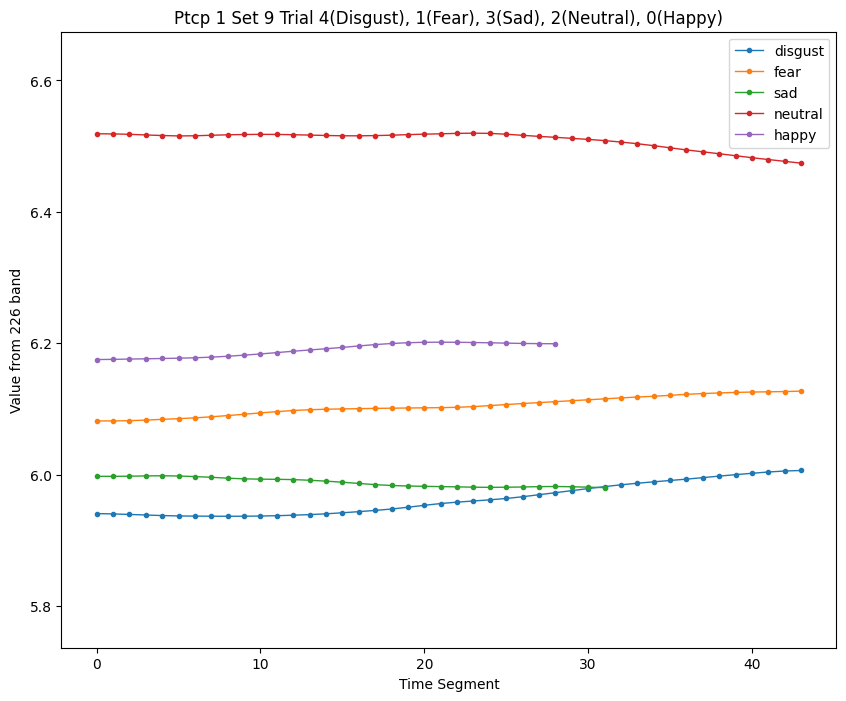

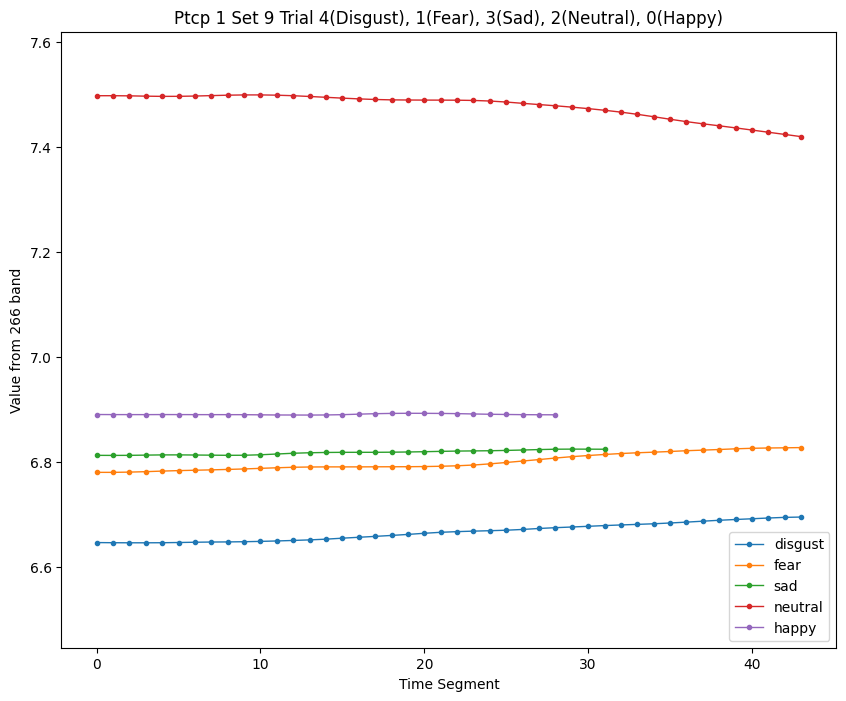

In [258]:
import matplotlib.pyplot as plt

freqB = [25, 70, 110, 221, 226, 266]

emotions_trial = {
    'set': {
        1: {'d': 4, 'f': 1, 's': 3, 'n': 2, 'h': 0},
        2: {'d': 9, 'f': 6, 's': 8, 'n': 7, 'h': 5},
        3: {'d': 14, 'f': 11, 's': 13, 'n': 12, 'h': 10},
        4: {'d': 18, 'f': 16, 's': 15, 'n': 17, 'h': 19},
        5: {'d': 21, 'f': 24, 's': 23, 'n': 22, 'h': 20},
        6: {'d': 29, 'f': 27, 's': 28, 'n': 25, 'h': 26},
        7: {'d': 33, 'f': 31, 's': 30, 'n': 32, 'h': 34},
        8: {'d': 36, 'f': 39, 's': 38, 'n': 37, 'h': 35},
        9: {'d': 44, 'f': 42, 's': 43, 'n': 40, 'h': 41}
    }
}

    
def selective_freqB_plot(freqB):
    df_FrequencyBand = {}  # Dictionary to store the DataFrames for each channel
    
    for channel in freqB:
        df_list = {'disgust': df_0_disgust[channel], 'fear': df_1_fear[channel],
                'sad': df_2_sad[channel], 'neutral': df_3_neutal[channel], 'happy': df_4_happy[channel]}

        # Create an empty DataFrame
        df_FrequencyBand[channel] = pd.DataFrame()

        # Concatenate the data frames in the df_list into the combined_df
        for label, df in df_list.items():
            df_FrequencyBand[channel][label] = df

        # Create a larger figure with a figsize parameter
        # Adjust the width and height as desired
        fig, ax = plt.subplots(figsize=(10, 8))

        # Plot the combined DataFrame
        df_FrequencyBand[channel].plot(
            y=['disgust', 'fear', 'sad', 'neutral', 'happy'], linewidth=1, marker='.', alpha=1, ax=ax)

        max_value = df_FrequencyBand[channel].min().max() + 0.2
        min_value = df_FrequencyBand[channel].min().min() - 0.2
        plt.ylim(min_value, max_value)

        # Set the plot title and labels
        plt.title(
            f'Ptcp {ptz} Set {set_number} Trial {d}(Disgust), {f}(Fear), {s}(Sad), {n}(Neutral), {h}(Happy)')
        plt.xlabel('Time Segment')
        plt.ylabel(f'Value from {channel} band')

        # Save the plot
        plt.savefig(f'plot_set{set_number}_band{channel}_p{ptz}.png')
        # plt.show()


for set_number in range(1, 10, 1):

    disgust = emotions_trial['set'][set_number]['d']
    fear = emotions_trial['set'][set_number]['f']
    sad = emotions_trial['set'][set_number]['s']
    neutral = emotions_trial['set'][set_number]['n']
    happy = emotions_trial['set'][set_number]['h']

    df_0_disgust = pd.DataFrame(data=data[disgust])
    df_1_fear = pd.DataFrame(data=data[fear])
    df_2_sad = pd.DataFrame(data=data[sad])
    df_3_neutal = pd.DataFrame(data=data[neutral])
    df_4_happy = pd.DataFrame(data=data[happy])
    
    selective_freqB_plot(freqB)



In [257]:

emotions_trial = {
    'set': {
        1: {'d': 4, 'f': 1, 's': 3, 'n': 2, 'h': 0},
        2: {'d': 9, 'f': 6, 's': 8, 'n': 7, 'h': 5},
        3: {'d': 14, 'f': 11, 's': 13, 'n': 12, 'h': 10},
        4: {'d': 18, 'f': 16, 's': 15, 'n': 17, 'h': 19},
        5: {'d': 21, 'f': 24, 's': 23, 'n': 22, 'h': 20},
        6: {'d': 29, 'f': 27, 's': 28, 'n': 25, 'h': 26},
        7: {'d': 33, 'f': 31, 's': 30, 'n': 32, 'h': 34},
        8: {'d': 36, 'f': 39, 's': 38, 'n': 37, 'h': 35},
        9: {'d': 44, 'f': 42, 's': 43, 'n': 40, 'h': 41}
    }
}

for set_number in range(1, 10):
    
    disgust = emotions_trial['set'][set_number]['d']
    fear = emotions_trial['set'][set_number]['f']
    sad = emotions_trial['set'][set_number]['s']
    neutral = emotions_trial['set'][set_number]['n']
    happy = emotions_trial['set'][set_number]['h']
    # print(set_number)
    print(disgust)
    print(fear)
    print(sad)
    print(neutral)
    print(happy)

    # selective_freqB_plot(freqB)

4
1
3
2
0
9
6
8
7
5
14
11
13
12
10
18
16
15
17
19
21
24
23
22
20
29
27
28
25
26
33
31
30
32
34
36
39
38
37
35
44
42
43
40
41


### Mean of every 15 Frequency Band

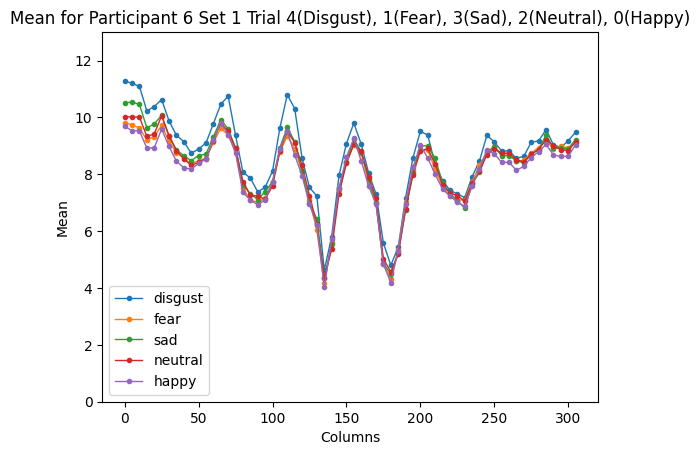

In [85]:
result_df_mean.plot(
    x='Columns', y=['disgust',  'fear', 'sad', 'neutral', 'happy'], linewidth=1, marker='.', alpha=1)

plt.ylim(0,13)
# Set the plot title and labels
plt.title(
    f'Mean for Participant {ptz} Set {set} Trial {d}(Disgust), {f}(Fear), {s}(Sad), {n}(Neutral), {h}(Happy)')
plt.xlabel('Columns')
plt.ylabel('Mean')

# Show the plot
plt.savefig(f'plot_mean_set{set}_p{ptz}.png')
plt.show()


In [83]:
df_list = {'disgust': df_0_disgust, 'fear': df_1_fear,
           'sad': df_2_sad, 'neutral': df_3_neutal, 'happy': df_4_happy}

# Create an empty DataFrame to store the results
result_df_mean = pd.DataFrame(
    columns=['Columns', 'happy', 'fear', 'neutral', 'sad', 'disgust'])

# for i in range(0, 310, 15):
for i in range(0,310,5):
    result_row = {'Columns': f'{i}'}

    for dfname, df in df_list.items():
        column_range = df.iloc[:, i].values
        mean = round(np.mean(column_range), 2)
        max_val = np.max(column_range)
        min_val = np.min(column_range)
        contrast = round((max_val - min_val) * 10, 2)

        result_row[dfname] = mean

    result_df_mean = result_df_mean.append(result_row, ignore_index=True)

# Print the resulting DataFrame
# print(result_df_mean)


/tmp/ipykernel_4240/2110263995.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_mean = result_df_mean.append(result_row, ignore_index=True)
/tmp/ipykernel_4240/2110263995.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_mean = result_df_mean.append(result_row, ignore_index=True)
/tmp/ipykernel_4240/2110263995.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_mean = result_df_mean.append(result_row, ignore_index=True)
/tmp/ipykernel_4240/2110263995.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_mean = result_df_mean.append(result_row, ignore_index=True)
/tmp/ipykernel_4240/21102639

### contrast rate

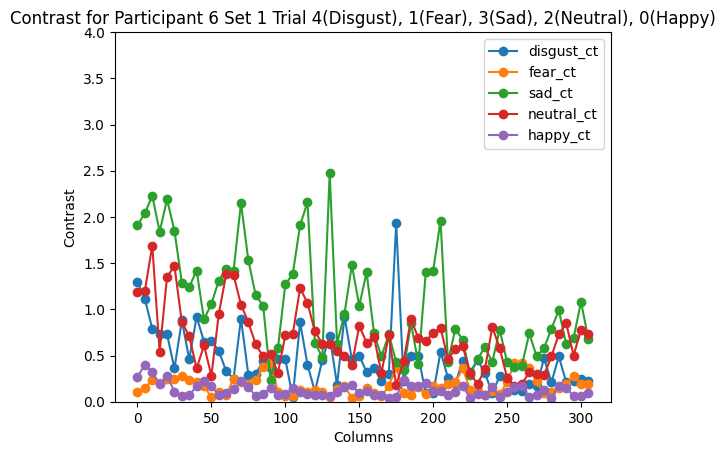

In [86]:
result_df_contrast.plot(x='Columns_ct', y=['disgust_ct',  'fear_ct', 'sad_ct',
                                           'neutral_ct', 'happy_ct'], marker='o')

plt.title(
    f'Contrast for Participant {ptz} Set {set} Trial {d}(Disgust), {f}(Fear), {s}(Sad), {n}(Neutral), {h}(Happy)')
plt.ylim(0, 4)
plt.xlabel('Columns')
plt.ylabel('Contrast')

plt.savefig(f'plot_contrast_set{set}_p{ptz}.png')
plt.show()


In [84]:
df_list = {'disgust_ct': df_0_disgust, 'fear_ct': df_1_fear,
           'sad_ct': df_2_sad, 'neutral_ct': df_3_neutal, 'happy_ct': df_4_happy}

# Create an empty DataFrame to store the results
result_df_contrast = pd.DataFrame(
    columns=['Columns_ct', 'happy_ct', 'fear_ct', 'neutral_ct', 'sad_ct', 'disgust_ct'])

for i in range(0, 310, 5):
    result_row = {'Columns_ct': f'{i}'}

    for dfname, df in df_list.items():
        column_range = df.iloc[:, i].values
        mean = round(np.mean(column_range), 2)
        max_val = np.max(column_range)
        min_val = np.min(column_range)
        contrast = round((max_val - min_val) * 10, 2)

        result_row[dfname] = contrast

    result_df_contrast = result_df_contrast.append(result_row, ignore_index=True)

# Print the resulting DataFrame
# print(result_df_contrast)


/tmp/ipykernel_4240/1955849613.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_contrast = result_df_contrast.append(result_row, ignore_index=True)
/tmp/ipykernel_4240/1955849613.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_contrast = result_df_contrast.append(result_row, ignore_index=True)
/tmp/ipykernel_4240/1955849613.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_contrast = result_df_contrast.append(result_row, ignore_index=True)
/tmp/ipykernel_4240/1955849613.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_contrast = result_df_contrast.append(result_row, ignore_index=Tr

## Plot individually

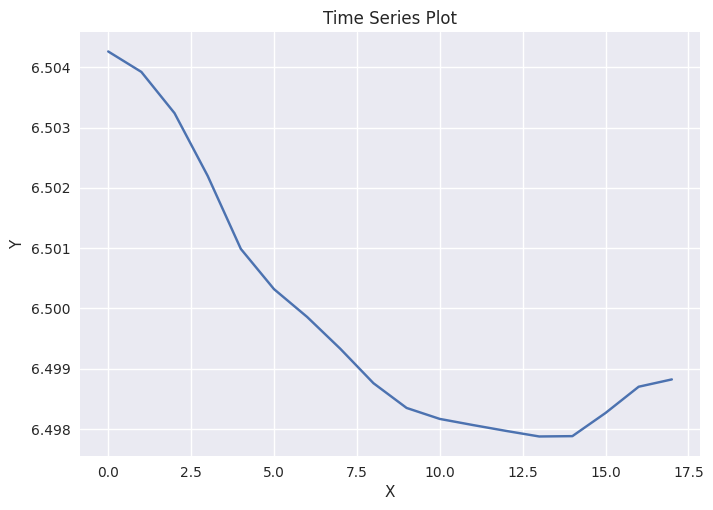

In [29]:
x = np.arange(0, len(row_means))

# Create a line plot with x as the x-values and row_means as the y-values
plt.plot(x, row_means)

# Set the labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Time Series Plot')

# Display the plot
plt.show()


#### Plot only one channel

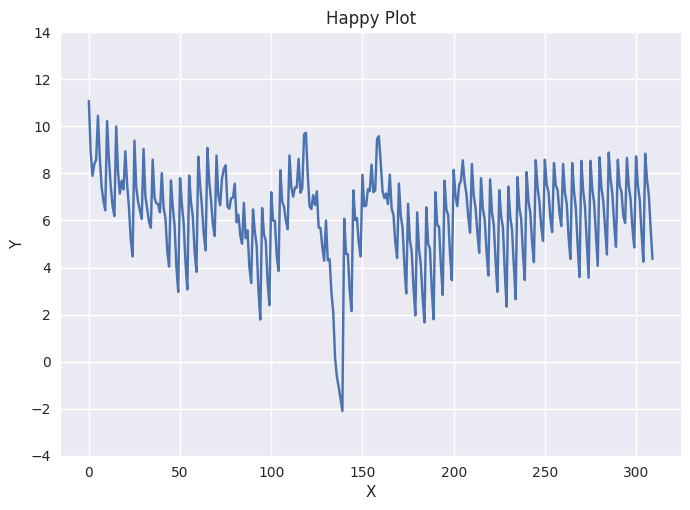

In [31]:
x = np.arange(0, len(data[0][0]))

# Create a line plot with x as the x-values and row_means as the y-values
plt.plot(x, data[0][0])

plt.ylim(-4,14)
# Set the labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{label_dict[label[0][0]]} Plot')

# Display the plot
plt.show()


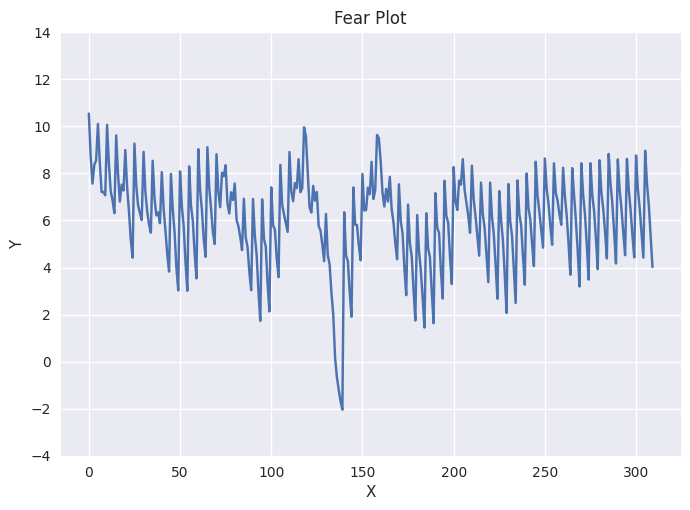

In [ ]:
x = np.arange(0, len(data[1][0]))

# Create a line plot with x as the x-values and row_means as the y-values
plt.plot(x, data[1][0])
plt.ylim(-4, 14)
# Set the labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{label_dict[label[1][0]]} Plot')

# Display the plot
plt.show()


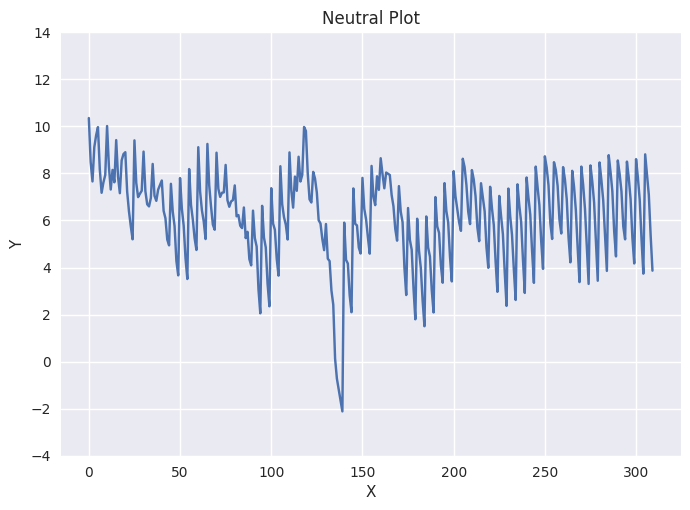

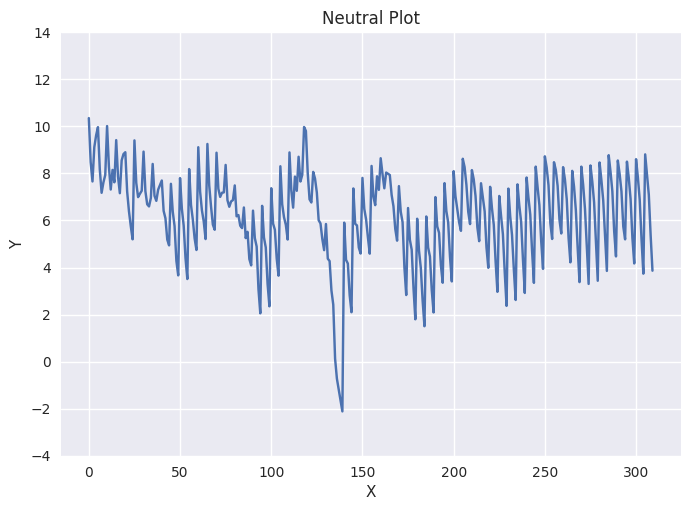

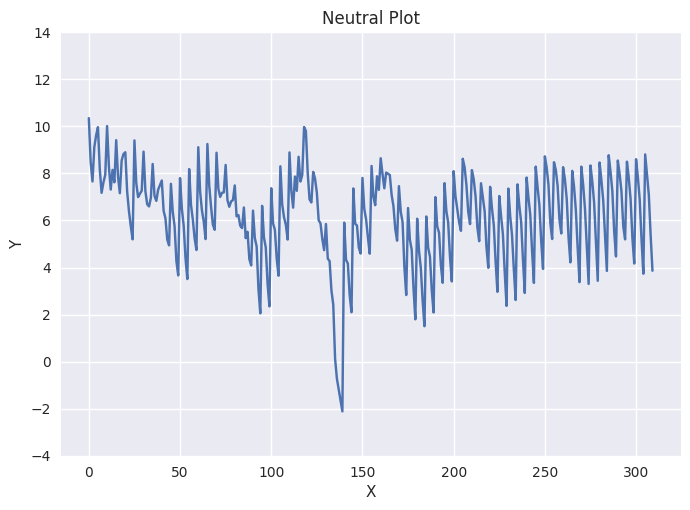

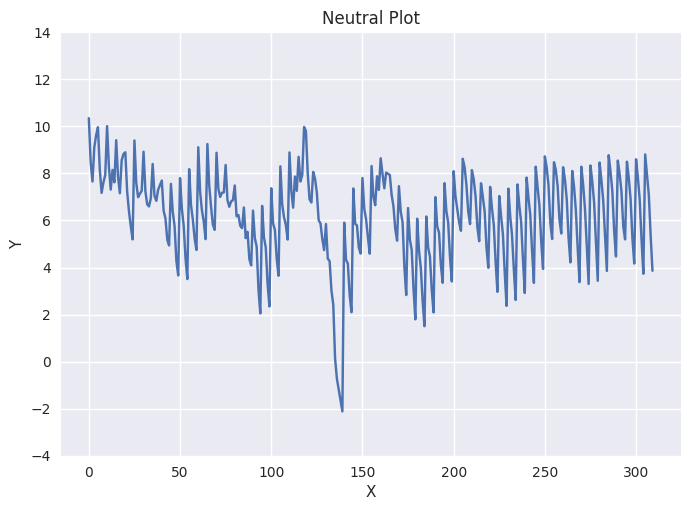

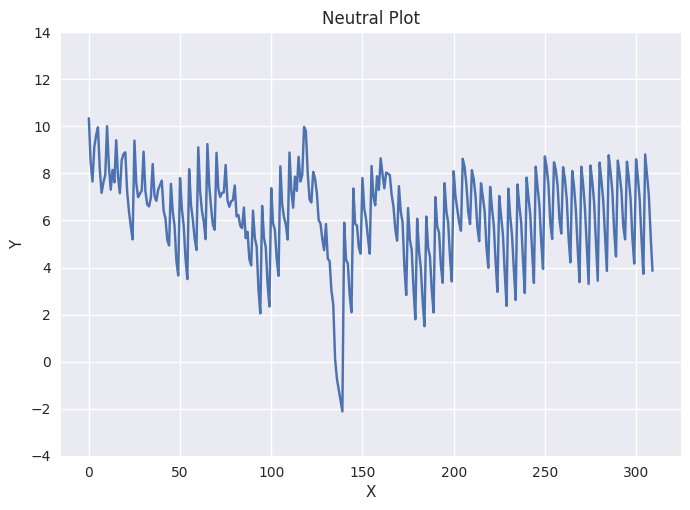

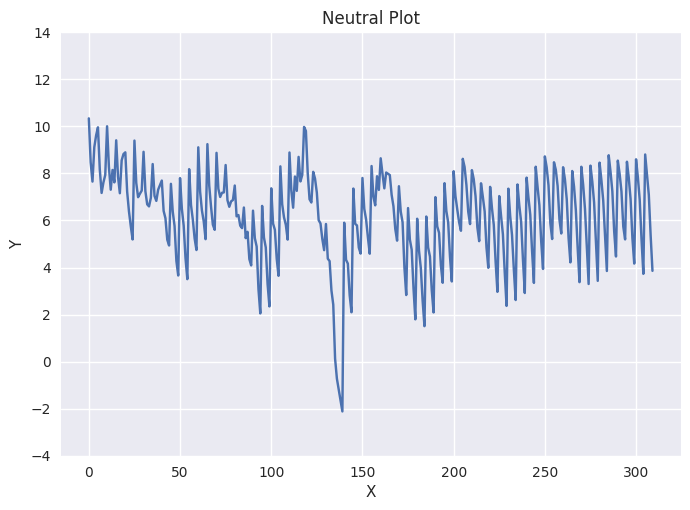

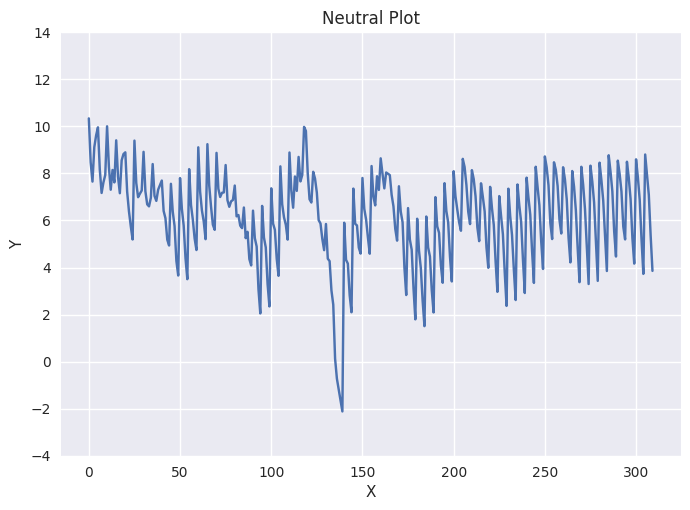

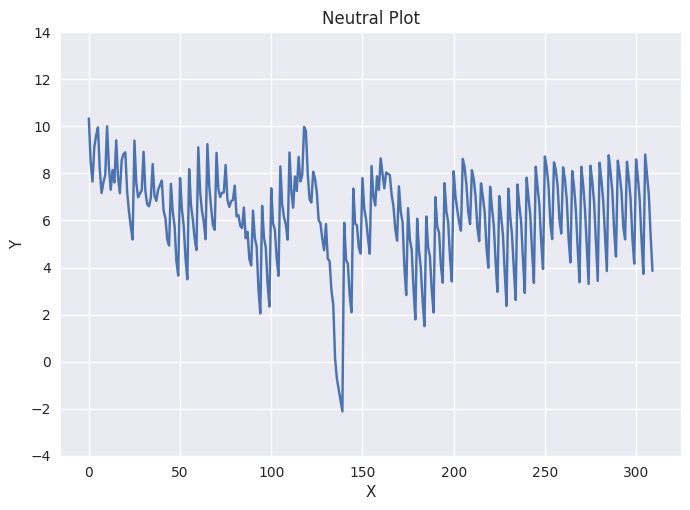

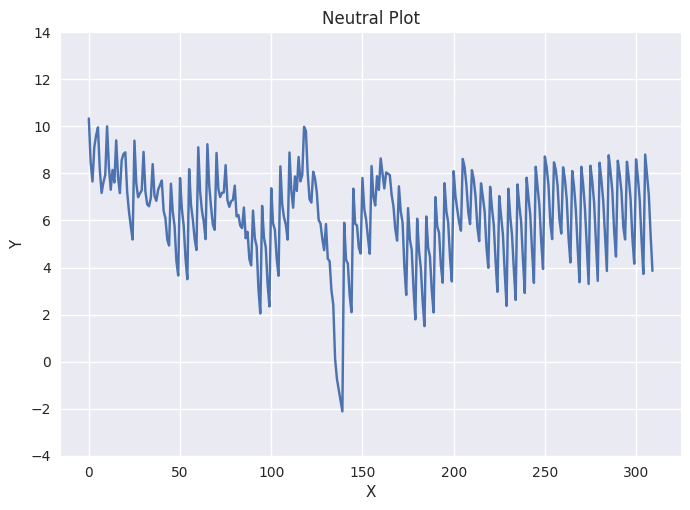

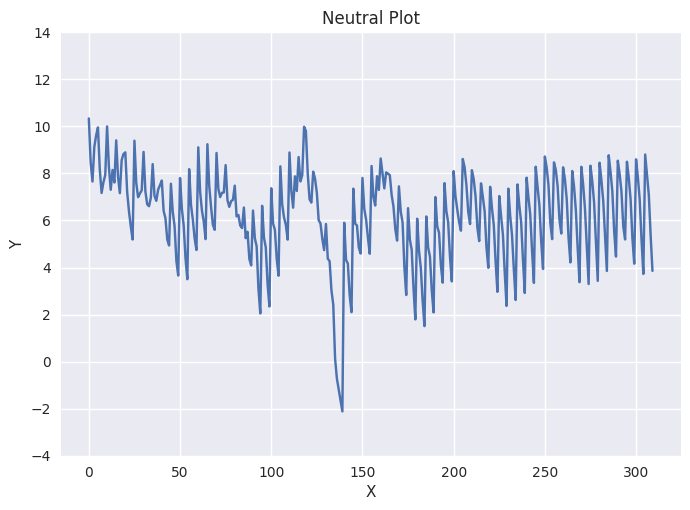

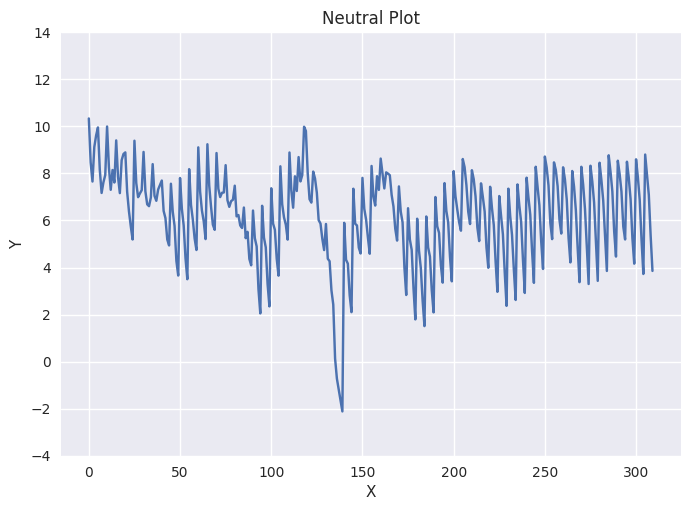

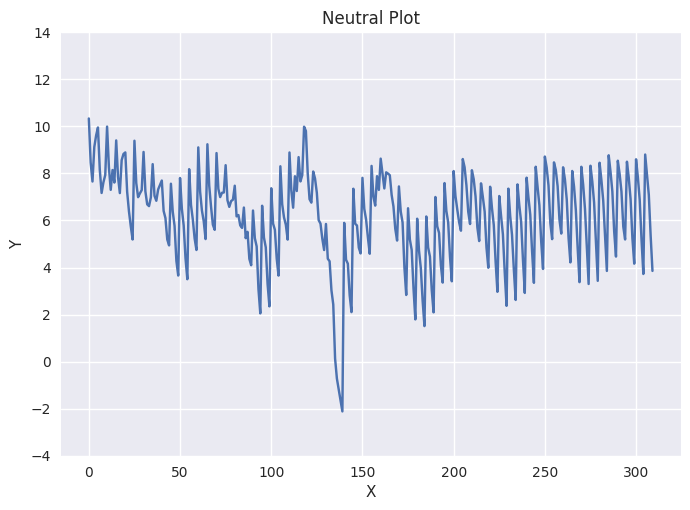

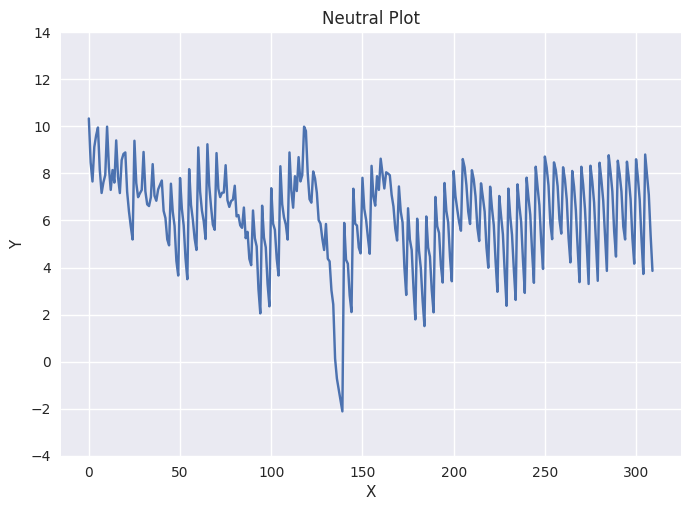

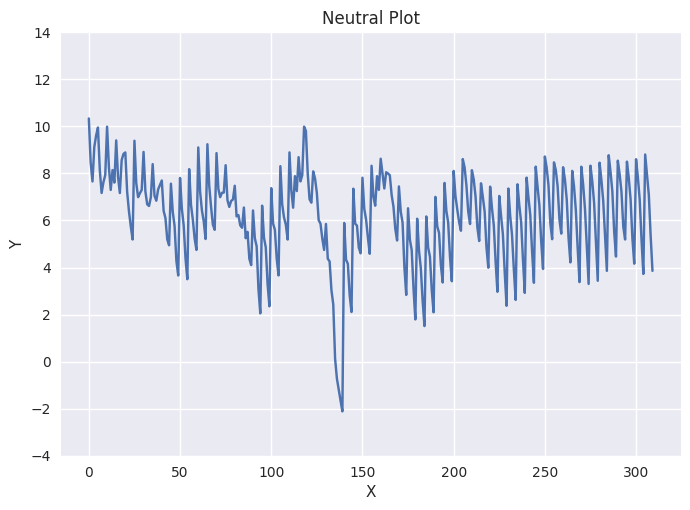

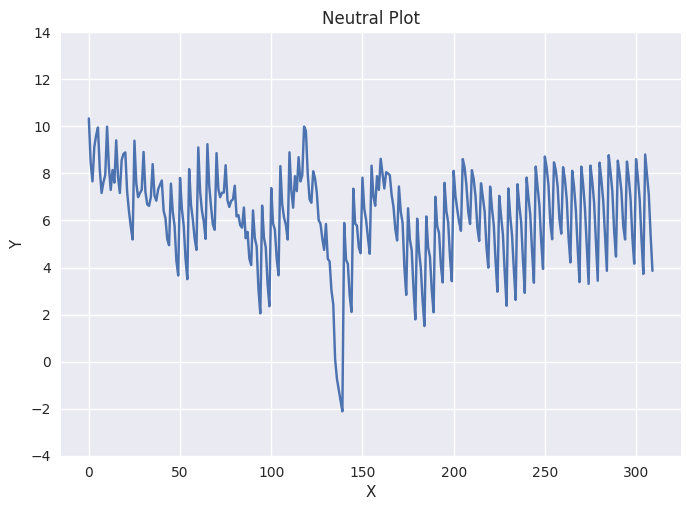

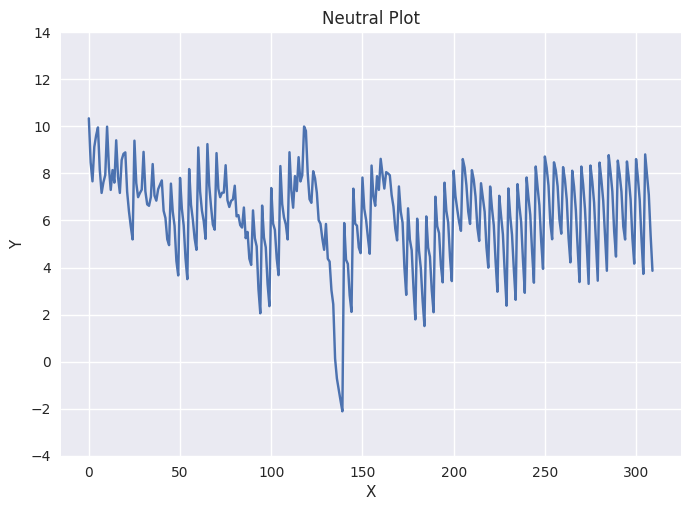

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(16):
    x = np.arange(0, len(data[2][i]))

    # Create a line plot with x as the x-values and data[2][i] as the y-values
    plt.plot(x, data[2][i])
    plt.ylim(-4, 14)
    # Set the labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'{label_dict[label[2][i]]} Plot')

    # Display the plot
    plt.show()
